In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from glob import glob
from astropy.table import Table
from uncertainties import ufloat
from uncertainties import unumpy
from uncertainties.umath import * 
from astropy.io import ascii
from astropy.coordinates import SkyCoord
import astropy.units as u
from astroquery.vizier import Vizier
from astropy.utils.console import ProgressBar
from shutil import copyfile

In [2]:
#reading in intial data
hflat=glob('/media/daniel/disk/observ_final_data/EarlyMay_1x1/h_flat/*.fits')
rflat=glob('/media/daniel/disk/observ_final_data/EarlyMay_1x1/r_flat/*.fits')
bias=glob('/media/daniel/disk/observ_final_data/EarlyMay_1x1/zeros/*.fits')
binned_bias=glob('/media/daniel/disk/project_3_Data/calibs/EarlyApril/Binned_2x2/zeros/*')

ic3687=glob('/media/daniel/disk/observ_final_data/dwarf/M94_Group_Dwarf_Galaxies/IC3687/*')
ngc4163=glob('/media/daniel/disk/observ_final_data/dwarf/M94_Group_Dwarf_Galaxies/NGC4163/*')
ugc6817=glob('/media/daniel/disk/observ_final_data/dwarf/M94_Group_Dwarf_Galaxies/UGC6817/*.fits')
ugc7559=glob('/media/daniel/disk/observ_final_data/dwarf/M94_Group_Dwarf_Galaxies/UGC7559/*')
ugc7577=glob('/media/daniel/disk/observ_final_data/dwarf/M94_Group_Dwarf_Galaxies/UGC7577/*')
ugc7605=glob('/media/daniel/disk/observ_final_data/dwarf/M94_Group_Dwarf_Galaxies/UGC7605/*')
ugc8320=glob('/media/daniel/disk/observ_final_data/dwarf/M94_Group_Dwarf_Galaxies/UGC8320/*')
ugc8651=glob('/media/daniel/disk/observ_final_data/dwarf/M94_Group_Dwarf_Galaxies/UGC8651/*')
ugc8760=glob('/media/daniel/disk/observ_final_data/dwarf/M94_Group_Dwarf_Galaxies/UGC8760/*')
ugc9128=glob('/media/daniel/disk/observ_final_data/dwarf/M94_Group_Dwarf_Galaxies/UGC9128/*')

In [3]:
shots=ic3687+ngc4163+ugc6817+ugc7559+ugc7577+ugc7605+ugc8320+ugc8651+ugc8760+ugc9128
for name in shots:
    print(fits.open(name)[0].header['OBJECT'], fits.open(name)[0].header['CCDSEC'])

IC3687 [1:1024,350:649]
IC3687 [1:1024,350:649]
IC3687 [1:1024,350:649]
IC3687 [1:1024,350:649]
NGC4163 [1:1024,1:1024]
NGC4163 [1:1024,1:1024]
NGC4163 [1:1024,1:1024]
NGC4163 [1:1024,1:1024]
NGC4163 [1:1024,1:1024]
NGC4163 [1:1024,1:1024]
UGC6817 [1:1024,350:649]
UGC6817 [1:1024,350:649]
UGC6817 [1:1024,350:649]
UGC6817 [1:1024,350:649]
UGC6817 [1:1024,350:649]
UGC6817 [1:1024,350:649]
UGC7559 [1:1024,350:649]
UGC7559 [1:1024,350:649]
UGC7559 [1:1024,350:649]
UGC7559 [1:1024,350:649]
UGC7559 [1:1024,350:649]
UGC7559 [1:1024,350:649]
UGC7577 [1:1024,1:1024]
UGC7577 [1:1024,1:1024]
UGC7577 [1:1024,1:1024]
UGC7577 [1:1024,1:1024]
UGC7577 [1:1024,1:1024]
UGC7577 [1:1024,1:1024]
UGC7605 [1:1024,350:649]
UGC7605 [1:1024,350:649]
UGC7605 [1:1024,350:649]
UGC7605 [1:1024,350:649]
UGC7605 [1:1024,350:649]
UGC7605 [1:1024,350:649]
UGC8320 [1:1024,1:1024]
UGC8320 [1:1024,1:1024]
UGC8320 [1:1024,1:1024]
UGC8320 [1:1024,1:1024]
UGC8320 [1:1024,1:1024]
UGC8320 [1:1024,1:1024]
UGC8651 [1:1024,350:64

In [4]:
def combinerbias(flat):#pulls a bias, converts to an array, then adds it to the array of arrays
    x=[]
    for y in flat:
        x.append(fits.getdata(y))
    return x

In [5]:
#creating master bias
master_bias=np.median(combinerbias(bias),axis=0)
master_bias_bin=np.median(combinerbias(binned_bias),axis=0)


In [6]:
def combiner(flat):#pulls a flat, converts to an array, subtracts the master bias, then adds it to the array of arrays
    x=[]
    for y in flat:
        x.append(((fits.getdata(y)-master_bias)))
        
    return x

In [7]:
def make_master_flat(flats):
    master_flat=np.median(combiner(flats),axis=0)
    master_flat=master_flat/np.median(master_flat)
    return master_flat

In [8]:
#creating master flats for both 2020 
master_hflat=make_master_flat(hflat)
master_rflat=make_master_flat(rflat)





In [9]:
#data is binned need to bin the flats

In [10]:
def rebin(arr, new_shape):
    shape = (new_shape[0], arr.shape[0] // new_shape[0],
             new_shape[1], arr.shape[1] // new_shape[1])
    return arr.reshape(shape).mean(-1).mean(1)

In [11]:
#data is only on the 2048X2048 part so need to trim it before doing the rebin
#need to trim all shots as well to 1024x1024 and the binned master bias
#also need to make the sub-array where y:350-649

In [12]:
def trimmerflat(arry):
    trimmed=[]
    for x in range(0,2048):
        trimmed.append(arry[x][:2048])
    return np.array(trimmed)

In [101]:
def trimmer(arry,*args):#for trimming to 1024x1024 ymin,ymax
    trimmed=[]
    if len(args)>0 and args[0]==(1,):
        for x in range(0,300):
            trimmed.append(arry[x][:1024])

    else:
        for x in range(0,1024):
            trimmed.append(arry[x][:1024])
    return np.array(trimmed)

In [102]:
master_hflat_trim=trimmerflat(master_hflat)
master_rflat_trim=trimmerflat(master_rflat)
master_bias_trim=trimmer(master_bias_bin)


In [70]:
master_hflat_bin=rebin(master_hflat_trim,(1024,1024))
master_rflat_bin=rebin(master_rflat_trim,(1024,1024))

In [16]:
master_hflat_mini=[]
for y in range(349,649):
    master_hflat_mini.append(master_hflat_bin[y])

master_rflat_mini=[]
for y in range(349,649):
    master_rflat_mini.append(master_rflat_bin[y])

master_bias_mini=[]
for y in range(349,649):
    master_bias_mini.append(master_bias_trim[y])


In [17]:
def imsorter(images): #returns array of arrays, index 0-4 goes u,g,r,i,Ha filter.
    x=0
    returnarray=[]
    g=[]
    u=[]
    i=[]
    r=[]
    h=[]
    while x<len(images):
        hdul = fits.open(images[x])  # open a FITS file
        hdr = hdul[0].header
        if hdr['INSFILTE']=='g':
            g.append(images[x])
        if hdr['INSFILTE']=='u':
            u.append(images[x])
        if hdr['INSFILTE']=='i':
            i.append(images[x])
        if hdr['INSFILTE']=='r':
            r.append(images[x])
        if hdr['INSFILTE']=='Ha' or hdr['INSFILTE']=='H':
            h.append(images[x])
        x+=1
    returnarray.append(u)
    returnarray.append(g)
    returnarray.append(r)
    returnarray.append(i)
    returnarray.append(h)
    
    return returnarray

In [18]:
#sorting images for arp302, ngc4038, ugc8335
ic3687_sorted=imsorter(ic3687)
ngc4163_sorted=imsorter(ngc4163)
ugc6817_sorted=imsorter(ugc6817)
ugc7559_sorted=imsorter(ugc7559)
ugc7577_sorted=imsorter(ugc7577)
ugc7605_sorted=imsorter(ugc7605)
ugc8320_sorted=imsorter(ugc8320)
ugc8651_sorted=imsorter(ugc8651)
ugc8760_sorted=imsorter(ugc8760)
ugc9128_sorted=imsorter(ugc9128)


In [19]:
# allshots=m101_sorted+ngc2903_sorted+ngc6946_sorted+m51_sorted+m82_sorted
# for item in allshots:
#     for arry in item:
#         print(arry)
#         print(fits.open(arry)[0].header['EXPTIME'],fits.open(arry)[0].header['INSFILTE'] )
#         print()

In [29]:
#reading in data to arrays r=2, h=4
ic3687_r=[]
ngc4163_r=[]
ugc6817_r=[]
ugc7559_r=[]
ugc7577_r=[]
ugc7605_r=[]
ugc8320_r=[]
ugc8651_r=[]
ugc8760_r=[]
ugc9128_r=[]

ic3687_h=[]
ngc4163_h=[]
ugc6817_h=[]
ugc7559_h=[]
ugc7577_h=[]
ugc7605_h=[]
ugc8320_h=[]
ugc8651_h=[]
ugc8760_h=[]
ugc9128_h=[]


for name in ic3687_sorted[2]:
    ic3687_r.append(fits.getdata(name))

for name in ic3687_sorted[4]:
    ic3687_h.append(fits.getdata(name))
    
    
for name in ngc4163_sorted[2]:
    ngc4163_r.append(fits.getdata(name))

for name in ngc4163_sorted[4]:
    ngc4163_h.append(fits.getdata(name))
    
    
for name in ugc6817_sorted[2]:
    ugc6817_r.append(fits.getdata(name))

for name in ugc6817_sorted[4]:
    ugc6817_h.append(fits.getdata(name))
    
    
for name in ugc7559_sorted[2]:
    ugc7559_r.append(fits.getdata(name))

for name in ugc7559_sorted[4]:
    ugc7559_h.append(fits.getdata(name))
        
    
for name in ugc7577_sorted[2]:
    ugc7577_r.append(fits.getdata(name))

for name in ugc7577_sorted[4]:
    ugc7577_h.append(fits.getdata(name))
            
    
for name in ugc7605_sorted[2]:
    ugc7605_r.append(fits.getdata(name))

for name in ugc7605_sorted[4]:
    ugc7605_h.append(fits.getdata(name))
                
    
for name in ugc8320_sorted[2]:
    ugc8320_r.append(fits.getdata(name))

for name in ugc8320_sorted[4]:
    ugc8320_h.append(fits.getdata(name))
                    
    
for name in ugc8651_sorted[2]:
    ugc8651_r.append(fits.getdata(name))

for name in ugc8651_sorted[4]:
    ugc8651_h.append(fits.getdata(name))
                        
    
for name in ugc8760_sorted[2]:
    ugc8760_r.append(fits.getdata(name))

for name in ugc8760_sorted[4]:
    ugc8760_h.append(fits.getdata(name))
                            
    
for name in ugc9128_sorted[2]:
    ugc9128_r.append(fits.getdata(name))

for name in ugc9128_sorted[4]:
    ugc9128_h.append(fits.getdata(name))

In [30]:
def multitrimmer(arry,*args):
    returnarry=[]
    for shot in arry:
        returnarry.append(trimmer(shot,args))
    return returnarry

In [103]:
#trimming shots
ngc4163_r_trim=multitrimmer(ngc4163_r)
ngc4163_h_trim=multitrimmer(ngc4163_h)

ugc7577_r_trim=multitrimmer(ugc7577_r)
ugc7577_h_trim=multitrimmer(ugc7577_h)

ugc8320_r_trim=multitrimmer(ugc8320_r)
ugc8320_h_trim=multitrimmer(ugc8320_h)

ic3687_r_trim=multitrimmer(ic3687_r,1)
ic3687_h_trim=multitrimmer(ic3687_h,1)

ic3687_r_trim=multitrimmer(ic3687_r,1)
ic3687_h_trim=multitrimmer(ic3687_h,1)

ugc6817_r_trim=multitrimmer(ugc6817_r,1)
ugc6817_h_trim=multitrimmer(ugc6817_h,1)

ugc7559_r_trim=multitrimmer(ugc7559_r,1)
ugc7559_h_trim=multitrimmer(ugc7559_h,1)

ugc7605_r_trim=multitrimmer(ugc7605_r,1)
ugc7605_h_trim=multitrimmer(ugc7605_h,1)

ugc8651_r_trim=multitrimmer(ugc8651_r,1)
ugc8651_h_trim=multitrimmer(ugc8651_h,1)

ugc8760_r_trim=multitrimmer(ugc8760_r,1)
ugc8760_h_trim=multitrimmer(ugc8760_h,1)

ugc9128_r_trim=multitrimmer(ugc9128_r,1)
ugc9128_h_trim=multitrimmer(ugc9128_h,1)

In [105]:
# #applying calibrations. I divide by exposure time to prepare the images for stacking later.

ic3687_r_processed=[]
for x in range(0, len(ic3687_r_trim)):
    ic3687_r_processed.append((ic3687_r_trim[x]-master_bias_mini)/master_rflat_mini/fits.open(ic3687_sorted[2][x])[0].header['EXPTIME'])

ic3687_h_processed=[]
for x in range(0, len(ic3687_h_trim)):
    ic3687_h_processed.append((ic3687_h_trim[x]-master_bias_mini)/master_hflat_mini/fits.open(ic3687_sorted[4][x])[0].header['EXPTIME'])


ugc6817_r_processed=[]
for x in range(0, len(ugc6817_r_trim)):
    ugc6817_r_processed.append((ugc6817_r_trim[x]-master_bias_mini)/master_rflat_mini/fits.open(ugc6817_sorted[2][x])[0].header['EXPTIME'])

ugc6817_h_processed=[]
for x in range(0, len(ugc6817_h_trim)):
    ugc6817_h_processed.append((ugc6817_h_trim[x]-master_bias_mini)/master_hflat_mini/float(fits.open(ugc6817_sorted[4][x])[0].header['EXPTIME']))
    
    
ugc7559_r_processed=[]
for x in range(0, len(ugc7559_r_trim)):
    ugc7559_r_processed.append((ugc7559_r_trim[x]-master_bias_mini)/master_rflat_mini/fits.open(ugc7559_sorted[2][x])[0].header['EXPTIME'])

ugc7559_h_processed=[]
for x in range(0, len(ugc7559_h_trim)):
    ugc7559_h_processed.append((ugc7559_h_trim[x]-master_bias_mini)/master_hflat_mini/fits.open(ugc7559_sorted[4][x])[0].header['EXPTIME'])
    
    
ugc7605_r_processed=[]
for x in range(0, len(ugc7605_r_trim)):
    ugc7605_r_processed.append((ugc7605_r_trim[x]-master_bias_mini)/master_rflat_mini/fits.open(ugc7605_sorted[2][x])[0].header['EXPTIME'])

ugc7605_h_processed=[]
for x in range(0, len(ugc7605_h_trim)):
    ugc7605_h_processed.append((ugc7605_h_trim[x]-master_bias_mini)/master_hflat_mini/fits.open(ugc7605_sorted[4][x])[0].header['EXPTIME'])
    
    
ugc8651_r_processed=[]
for x in range(0, len(ugc8651_r_trim)):
    ugc8651_r_processed.append((ugc8651_r_trim[x]-master_bias_mini)/master_rflat_mini/fits.open(ugc8651_sorted[2][x])[0].header['EXPTIME'])

ugc8651_h_processed=[]
for x in range(0, len(ugc8651_h_trim)):
    ugc8651_h_processed.append((ugc8651_h_trim[x]-master_bias_mini)/master_hflat_mini/fits.open(ugc8651_sorted[4][x])[0].header['EXPTIME'])
    
    
ugc8760_r_processed=[]
for x in range(0, len(ugc8760_r_trim)):
    ugc8760_r_processed.append((ugc8760_r_trim[x]-master_bias_mini)/master_rflat_mini/fits.open(ugc8760_sorted[2][x])[0].header['EXPTIME'])

ugc8760_h_processed=[]
for x in range(0, len(ugc8760_h_trim)):
    ugc8760_h_processed.append((ugc8760_h_trim[x]-master_bias_mini)/master_hflat_mini/fits.open(ugc8760_sorted[4][x])[0].header['EXPTIME'])
    
    
    
ugc9128_r_processed=[]
for x in range(0, len(ugc9128_r_trim)):
    ugc9128_r_processed.append((ugc9128_r_trim[x]-master_bias_mini)/master_rflat_mini/fits.open(ugc9128_sorted[2][x])[0].header['EXPTIME'])

ugc9128_h_processed=[]
for x in range(0, len(ugc9128_h_trim)):
    ugc9128_h_processed.append((ugc9128_h_trim[x]-master_bias_mini)/master_hflat_mini/fits.open(ugc9128_sorted[4][x])[0].header['EXPTIME'])
    
    
#full calib shots
ngc4163_r_processed=[]
for x in range(0, len(ngc4163_r_trim)):
    ngc4163_r_processed.append((ngc4163_r_trim[x]-master_bias_trim)/master_rflat_bin/fits.open(ngc4163_sorted[2][x])[0].header['EXPTIME'])

ngc4163_h_processed=[]
for x in range(0, len(ngc4163_h_trim)):
    ngc4163_h_processed.append((ngc4163_h_trim[x]-master_bias_trim)/master_hflat_bin/fits.open(ngc4163_sorted[4][x])[0].header['EXPTIME'])



ugc7577_r_processed=[]
for x in range(0, len(ugc7577_r_trim)):
    ugc7577_r_processed.append((ugc7577_r_trim[x]-master_bias_trim)/master_rflat_bin/fits.open(ugc7577_sorted[2][x])[0].header['EXPTIME'])

ugc7577_h_processed=[]
for x in range(0, len(ugc7577_h_trim)):
    ugc7577_h_processed.append((ugc7577_h_trim[x]-master_bias_trim)/master_hflat_bin/fits.open(ugc7577_sorted[4][x])[0].header['EXPTIME'])
    


ugc8320_r_processed=[]
for x in range(0, len(ugc8320_r_trim)):
    ugc8320_r_processed.append((ugc8320_r_trim[x]-master_bias_trim)/master_rflat_bin/fits.open(ugc8320_sorted[2][x])[0].header['EXPTIME'])

ugc8320_h_processed=[]
for x in range(0, len(ugc8320_h_trim)):
    ugc8320_h_processed.append((ugc8320_h_trim[x]-master_bias_trim)/master_hflat_bin/fits.open(ugc8320_sorted[4][x])[0].header['EXPTIME'])
    


In [107]:
def write_shot(arry, filepath):#only works for arry of arrys
    i=0
    for shot in arry:
        shot_to_write=fits.PrimaryHDU(shot)
        filename=filepath+str(i)+'.fits'
        shot_to_write.writeto(filename,overwrite=True)
        i+=1

In [109]:
#writing to fits file to upload to astrometry
write_shot(ic3687_r_processed,'/media/daniel/disk/observ_final_data/dwarf/processed/ic3687r')
write_shot(ic3687_h_processed,'/media/daniel/disk/observ_final_data/dwarf/processed/ic3687h')

write_shot(ugc6817_r_processed,'/media/daniel/disk/observ_final_data/dwarf/processed/ugc6817r')
write_shot(ugc6817_h_processed,'/media/daniel/disk/observ_final_data/dwarf/processed/ugc6817h')

write_shot(ugc7559_r_processed,'/media/daniel/disk/observ_final_data/dwarf/processed/ugc7559r')
write_shot(ugc7559_h_processed,'/media/daniel/disk/observ_final_data/dwarf/processed/ugc7559h')

write_shot(ugc7605_r_processed,'/media/daniel/disk/observ_final_data/dwarf/processed/ugc7605r')
write_shot(ugc7605_h_processed,'/media/daniel/disk/observ_final_data/dwarf/processed/ugc7605h')

write_shot(ugc8651_r_processed,'/media/daniel/disk/observ_final_data/dwarf/processed/ugc8651r')
write_shot(ugc8651_h_processed,'/media/daniel/disk/observ_final_data/dwarf/processed/ugc8651h')

write_shot(ugc8760_r_processed,'/media/daniel/disk/observ_final_data/dwarf/processed/ugc8760r')
write_shot(ugc8760_h_processed,'/media/daniel/disk/observ_final_data/dwarf/processed/ugc8760h')

write_shot(ugc9128_r_processed,'/media/daniel/disk/observ_final_data/dwarf/processed/ugc9128r')
write_shot(ugc9128_h_processed,'/media/daniel/disk/observ_final_data/dwarf/processed/ugc9128h')

write_shot(ngc4163_r_processed,'/media/daniel/disk/observ_final_data/dwarf/processed/ngc4163r')
write_shot(ngc4163_h_processed,'/media/daniel/disk/observ_final_data/dwarf/processed/ngc4163h')

write_shot(ugc7577_r_processed,'/media/daniel/disk/observ_final_data/dwarf/processed/ugc7577r')
write_shot(ugc7577_h_processed,'/media/daniel/disk/observ_final_data/dwarf/processed/ugc7577h')

write_shot(ugc8320_r_processed,'/media/daniel/disk/observ_final_data/dwarf/processed/ugc8320r')
write_shot(ugc8320_h_processed,'/media/daniel/disk/observ_final_data/dwarf/processed/ugc8320h')

had to remove ugc 6817 from the analysis because astrometry.net could not solve any of the images for it

In [111]:
def reproject(arry,filepath):
    j=0
    master=fits.open(get_pkg_data_filename(str(arry[0])))[0]
    while j<len(arry):
        reprojection = fits.open(get_pkg_data_filename(str(arry[j])))[0]
        array, footprint = reproject_interp(reprojection, master.header)
        fits.writeto(filepath+str(j)+'.fits', array, master.header, overwrite=True)
        j+=1


In [113]:
#First round of reprojections
from astropy.utils.data import get_pkg_data_filename
from reproject import reproject_interp
ic3687_astro_r=glob('/media/daniel/disk/observ_final_data/dwarf/astrometry/*ic3687r*.fits')
ugc7559_astro_r=glob('/media/daniel/disk/observ_final_data/dwarf/astrometry/*ugc7559r*.fits')
ugc7605_astro_r=glob('/media/daniel/disk/observ_final_data/dwarf/astrometry/*ugc7605r*.fits')
ugc8651_astro_r=glob('/media/daniel/disk/observ_final_data/dwarf/astrometry/*ugc8651r*.fits')
ugc8760_astro_r=glob('/media/daniel/disk/observ_final_data/dwarf/astrometry/*ugc8760r*.fits')
ugc9128_astro_r=glob('/media/daniel/disk/observ_final_data/dwarf/astrometry/*ugc9128r*.fits')
ngc4163_astro_r=glob('/media/daniel/disk/observ_final_data/dwarf/astrometry/*ngc4163r*.fits')
ugc7577_astro_r=glob('/media/daniel/disk/observ_final_data/dwarf/astrometry/*ugc7577r*.fits')
ugc8320_astro_r=glob('/media/daniel/disk/observ_final_data/dwarf/astrometry/*ugc8320r*.fits')

ic3687_astro_h=glob('/media/daniel/disk/observ_final_data/dwarf/astrometry/*ic3687h*.fits')
ugc7559_astro_h=glob('/media/daniel/disk/observ_final_data/dwarf/astrometry/*ugc7559h*.fits')
ugc7605_astro_h=glob('/media/daniel/disk/observ_final_data/dwarf/astrometry/*ugc7605h*.fits')
ugc8651_astro_h=glob('/media/daniel/disk/observ_final_data/dwarf/astrometry/*ugc8651h*.fits')
ugc8760_astro_h=glob('/media/daniel/disk/observ_final_data/dwarf/astrometry/*ugc8760h*.fits')
ugc9128_astro_h=glob('/media/daniel/disk/observ_final_data/dwarf/astrometry/*ugc9128h*.fits')
ngc4163_astro_h=glob('/media/daniel/disk/observ_final_data/dwarf/astrometry/*ngc4163h*.fits')
ugc7577_astro_h=glob('/media/daniel/disk/observ_final_data/dwarf/astrometry/*ugc7577h*.fits')
ugc8320_astro_h=glob('/media/daniel/disk/observ_final_data/dwarf/astrometry/*ugc8320h*.fits')



#REPROJECTING BY FILTER
reproject(ic3687_astro_h,'/media/daniel/disk/observ_final_data/dwarf/reproj_1/ic3678_h')
reproject(ic3687_astro_r,'/media/daniel/disk/observ_final_data/dwarf/reproj_1/ic3678_r')

reproject(ugc7559_astro_h,'/media/daniel/disk/observ_final_data/dwarf/reproj_1/ugc7559_h')
reproject(ugc7559_astro_r,'/media/daniel/disk/observ_final_data/dwarf/reproj_1/ugc7559_r')

reproject(ugc7605_astro_h,'/media/daniel/disk/observ_final_data/dwarf/reproj_1/ugc7605_h')
reproject(ugc7605_astro_r,'/media/daniel/disk/observ_final_data/dwarf/reproj_1/ugc7605_r')

reproject(ugc8651_astro_h,'/media/daniel/disk/observ_final_data/dwarf/reproj_1/ugc8651_h')
reproject(ugc8651_astro_r,'/media/daniel/disk/observ_final_data/dwarf/reproj_1/ugc8651_r')

reproject(ugc8760_astro_h,'/media/daniel/disk/observ_final_data/dwarf/reproj_1/ugc8760_h')
reproject(ugc8760_astro_r,'/media/daniel/disk/observ_final_data/dwarf/reproj_1/ugc8760_r')

reproject(ugc9128_astro_h,'/media/daniel/disk/observ_final_data/dwarf/reproj_1/ugc9128_h')
reproject(ugc9128_astro_r,'/media/daniel/disk/observ_final_data/dwarf/reproj_1/ugc9128_r')

reproject(ngc4163_astro_h,'/media/daniel/disk/observ_final_data/dwarf/reproj_1/ngc4163_h')
reproject(ngc4163_astro_r,'/media/daniel/disk/observ_final_data/dwarf/reproj_1/ngc4163_r')

reproject(ugc7577_astro_h,'/media/daniel/disk/observ_final_data/dwarf/reproj_1/ugc7577_h')
reproject(ugc7577_astro_r,'/media/daniel/disk/observ_final_data/dwarf/reproj_1/ugc7577_r')

reproject(ugc8320_astro_h,'/media/daniel/disk/observ_final_data/dwarf/reproj_1/ugc8320_h')
reproject(ugc8320_astro_r,'/media/daniel/disk/observ_final_data/dwarf/reproj_1/ugc8320_r')

In [122]:
#STACKING
ic3687_reproj1_name_r=glob('/media/daniel/disk/observ_final_data/dwarf/reproj_1/ic3678_r*')
ugc7559_reproj1_name_r=glob('/media/daniel/disk/observ_final_data/dwarf/reproj_1/ugc7559_r*')
ugc7605_reproj1_name_r=glob('/media/daniel/disk/observ_final_data/dwarf/reproj_1/ugc7605_r*')
ugc8651_reproj1_name_r=glob('/media/daniel/disk/observ_final_data/dwarf/reproj_1/ugc8651_r*')
ugc8760_reproj1_name_r=glob('/media/daniel/disk/observ_final_data/dwarf/reproj_1/ugc8760_r*')
ugc9128_reproj1_name_r=glob('/media/daniel/disk/observ_final_data/dwarf/reproj_1/ugc9128_r*')
ngc4163_reproj1_name_r=glob('/media/daniel/disk/observ_final_data/dwarf/reproj_1/ngc4163_r*')
ugc7577_reproj1_name_r=glob('/media/daniel/disk/observ_final_data/dwarf/reproj_1/ugc7577_r*')
ugc8320_reproj1_name_r=glob('/media/daniel/disk/observ_final_data/dwarf/reproj_1/ugc8320_r*')

ic3687_reproj1_name_h=glob('/media/daniel/disk/observ_final_data/dwarf/reproj_1/ic3678_h*')
ugc7559_reproj1_name_h=glob('/media/daniel/disk/observ_final_data/dwarf/reproj_1/ugc7559_h*')
ugc7605_reproj1_name_h=glob('/media/daniel/disk/observ_final_data/dwarf/reproj_1/ugc7605_h*')
ugc8651_reproj1_name_h=glob('/media/daniel/disk/observ_final_data/dwarf/reproj_1/ugc8651_h*')
ugc8760_reproj1_name_h=glob('/media/daniel/disk/observ_final_data/dwarf/reproj_1/ugc8760_h*')
ugc9128_reproj1_name_h=glob('/media/daniel/disk/observ_final_data/dwarf/reproj_1/ugc9128_h*')
ngc4163_reproj1_name_h=glob('/media/daniel/disk/observ_final_data/dwarf/reproj_1/ngc4163_h*')
ugc7577_reproj1_name_h=glob('/media/daniel/disk/observ_final_data/dwarf/reproj_1/ugc7577_h*')
ugc8320_reproj1_name_h=glob('/media/daniel/disk/observ_final_data/dwarf/reproj_1/ugc8320_h*')



#reading in arrays
ic3687_reproj1_arry_r=[]
ugc7559_reproj1_arry_r=[]
ugc7605_reproj1_arry_r=[]
ugc8651_reproj1_arry_r=[]
ugc8760_reproj1_arry_r=[]
ugc9128_reproj1_arry_r=[]
ngc4163_reproj1_arry_r=[]
ugc7577_reproj1_arry_r=[]
ugc8320_reproj1_arry_r=[]

ic3687_reproj1_arry_h=[]
ugc7559_reproj1_arry_h=[]
ugc7605_reproj1_arry_h=[]
ugc8651_reproj1_arry_h=[]
ugc8760_reproj1_arry_h=[]
ugc9128_reproj1_arry_h=[]
ngc4163_reproj1_arry_h=[]
ugc7577_reproj1_arry_h=[]
ugc8320_reproj1_arry_h=[]


for name in ic3687_reproj1_name_h:
    ic3687_reproj1_arry_h.append(fits.getdata(name))
    
for name in ic3687_reproj1_name_r:
    ic3687_reproj1_arry_r.append(fits.getdata(name))

    
for name in ugc7559_reproj1_name_h:
    ugc7559_reproj1_arry_h.append(fits.getdata(name))
    
for name in ugc7559_reproj1_name_r:
    ugc7559_reproj1_arry_r.append(fits.getdata(name))


for name in ugc7605_reproj1_name_h:
    ugc7605_reproj1_arry_h.append(fits.getdata(name))
    
for name in ugc7605_reproj1_name_r:
    ugc7605_reproj1_arry_r.append(fits.getdata(name))
    

for name in ugc8651_reproj1_name_h:
    ugc8651_reproj1_arry_h.append(fits.getdata(name))
    
for name in ugc8651_reproj1_name_r:
    ugc8651_reproj1_arry_r.append(fits.getdata(name))

    
for name in ugc8760_reproj1_name_h:
    ugc8760_reproj1_arry_h.append(fits.getdata(name))
    
for name in ugc8760_reproj1_name_r:
    ugc8760_reproj1_arry_r.append(fits.getdata(name))


for name in ugc9128_reproj1_name_h:
    ugc9128_reproj1_arry_h.append(fits.getdata(name))
    
for name in ugc9128_reproj1_name_r:
    ugc9128_reproj1_arry_r.append(fits.getdata(name))
    
    
for name in ngc4163_reproj1_name_h:
    ngc4163_reproj1_arry_h.append(fits.getdata(name))
    
for name in ngc4163_reproj1_name_r:
    ngc4163_reproj1_arry_r.append(fits.getdata(name))

    
for name in ugc7577_reproj1_name_h:
    ugc7577_reproj1_arry_h.append(fits.getdata(name))
    
for name in ugc7577_reproj1_name_r:
    ugc7577_reproj1_arry_r.append(fits.getdata(name))


for name in ugc8320_reproj1_name_h:
    ugc8320_reproj1_arry_h.append(fits.getdata(name))
    
for name in ugc8320_reproj1_name_r:
    ugc8320_reproj1_arry_r.append(fits.getdata(name))
    

In [200]:
# #STACKING AND WRITING TO FILE. Stacked by taking the mean of all images in a filter
fits.writeto('/media/daniel/disk/observ_final_data/dwarf/stacked/stacked_ic3678_r.fits',np.mean(ic3687_reproj1_arry_r,axis=0),fits.open(get_pkg_data_filename(str(ic3687_reproj1_name_r[0])))[0].header,overwrite=True)
fits.writeto('/media/daniel/disk/observ_final_data/dwarf/stacked/stacked_ugc7559_r.fits',np.mean(ugc7559_reproj1_arry_r,axis=0),fits.open(get_pkg_data_filename(str(ugc7559_reproj1_name_r[0])))[0].header,overwrite=True)
fits.writeto('/media/daniel/disk/observ_final_data/dwarf/stacked/stacked_ugc7605_r.fits',np.mean(ugc7605_reproj1_arry_r,axis=0),fits.open(get_pkg_data_filename(str(ugc7605_reproj1_name_r[0])))[0].header,overwrite=True)
fits.writeto('/media/daniel/disk/observ_final_data/dwarf/stacked/stacked_ugc8651_r.fits',np.mean(ugc8651_reproj1_arry_r,axis=0),fits.open(get_pkg_data_filename(str(ugc8651_reproj1_name_r[0])))[0].header,overwrite=True)
fits.writeto('/media/daniel/disk/observ_final_data/dwarf/stacked/stacked_ugc8760_r.fits',np.mean(ugc8760_reproj1_arry_r,axis=0),fits.open(get_pkg_data_filename(str(ugc8760_reproj1_name_r[0])))[0].header,overwrite=True)
fits.writeto('/media/daniel/disk/observ_final_data/dwarf/stacked/stacked_ugc9128_r.fits',np.mean(ugc9128_reproj1_arry_r,axis=0),fits.open(get_pkg_data_filename(str(ugc9128_reproj1_name_r[0])))[0].header,overwrite=True)
fits.writeto('/media/daniel/disk/observ_final_data/dwarf/stacked/stacked_ngc4163_r.fits',np.mean(ngc4163_reproj1_arry_r,axis=0),fits.open(get_pkg_data_filename(str(ngc4163_reproj1_name_r[0])))[0].header,overwrite=True)
fits.writeto('/media/daniel/disk/observ_final_data/dwarf/stacked/stacked_ugc7577_r.fits',np.mean(ugc7577_reproj1_arry_r,axis=0),fits.open(get_pkg_data_filename(str(ugc7577_reproj1_name_r[0])))[0].header,overwrite=True)
fits.writeto('/media/daniel/disk/observ_final_data/dwarf/stacked/stacked_ugc8320_r.fits',np.mean(ugc8320_reproj1_arry_r,axis=0),fits.open(get_pkg_data_filename(str(ugc8320_reproj1_name_r[0])))[0].header,overwrite=True)

fits.writeto('/media/daniel/disk/observ_final_data/dwarf/stacked/stacked_ic3678_h.fits',np.mean(ic3687_reproj1_arry_h,axis=0),fits.open(get_pkg_data_filename(str(ic3687_reproj1_name_h[0])))[0].header,overwrite=True)
fits.writeto('/media/daniel/disk/observ_final_data/dwarf/stacked/stacked_ugc7559_h.fits',np.mean(ugc7559_reproj1_arry_h,axis=0),fits.open(get_pkg_data_filename(str(ugc7559_reproj1_name_h[0])))[0].header,overwrite=True)
fits.writeto('/media/daniel/disk/observ_final_data/dwarf/stacked/stacked_ugc7605_h.fits',np.mean(ugc7605_reproj1_arry_h,axis=0),fits.open(get_pkg_data_filename(str(ugc7605_reproj1_name_h[0])))[0].header,overwrite=True)
fits.writeto('/media/daniel/disk/observ_final_data/dwarf/stacked/stacked_ugc8651_h.fits',np.mean(ugc8651_reproj1_arry_h,axis=0),fits.open(get_pkg_data_filename(str(ugc8651_reproj1_name_h[0])))[0].header,overwrite=True)
fits.writeto('/media/daniel/disk/observ_final_data/dwarf/stacked/stacked_ugc8760_h.fits',np.mean(ugc8760_reproj1_arry_h,axis=0),fits.open(get_pkg_data_filename(str(ugc8760_reproj1_name_h[0])))[0].header,overwrite=True)
fits.writeto('/media/daniel/disk/observ_final_data/dwarf/stacked/stacked_ugc9128_h.fits',np.mean(ugc9128_reproj1_arry_h,axis=0),fits.open(get_pkg_data_filename(str(ugc9128_reproj1_name_h[0])))[0].header,overwrite=True)
fits.writeto('/media/daniel/disk/observ_final_data/dwarf/stacked/stacked_ngc4163_h.fits',np.mean(ngc4163_reproj1_arry_h,axis=0),fits.open(get_pkg_data_filename(str(ngc4163_reproj1_name_h[0])))[0].header,overwrite=True)
fits.writeto('/media/daniel/disk/observ_final_data/dwarf/stacked/stacked_ugc7577_h.fits',np.mean(ugc7577_reproj1_arry_h,axis=0),fits.open(get_pkg_data_filename(str(ugc7577_reproj1_name_h[0])))[0].header,overwrite=True)
fits.writeto('/media/daniel/disk/observ_final_data/dwarf/stacked/stacked_ugc8320_h.fits',np.mean(ugc8320_reproj1_arry_h,axis=0),fits.open(get_pkg_data_filename(str(ugc8320_reproj1_name_h[0])))[0].header,overwrite=True)



In [201]:
def master_reproject(home,reproj,filepath):
    master=fits.open(get_pkg_data_filename(home))[0]
    reprojection = fits.open(get_pkg_data_filename(reproj))[0]
    array, footprint = reproject_interp(reprojection, master.header)
    fits.writeto(filepath+'.fits', array, master.header, overwrite=True)


In [203]:
#Reprojecting h onto r for the master images

master_reproject('/media/daniel/disk/observ_final_data/dwarf/stacked/stacked_ic3678_r.fits','/media/daniel/disk/observ_final_data/dwarf/stacked/stacked_ic3678_h.fits','/media/daniel/disk/observ_final_data/dwarf/master/ic3687_master_h')
master_reproject('/media/daniel/disk/observ_final_data/dwarf/stacked/stacked_ugc7559_r.fits','/media/daniel/disk/observ_final_data/dwarf/stacked/stacked_ugc7559_h.fits','/media/daniel/disk/observ_final_data/dwarf/master/ugc7559_master_h')
master_reproject('/media/daniel/disk/observ_final_data/dwarf/stacked/stacked_ugc7605_r.fits','/media/daniel/disk/observ_final_data/dwarf/stacked/stacked_ugc7605_h.fits','/media/daniel/disk/observ_final_data/dwarf/master/ugc7605_master_h')
master_reproject('/media/daniel/disk/observ_final_data/dwarf/stacked/stacked_ugc8651_r.fits','/media/daniel/disk/observ_final_data/dwarf/stacked/stacked_ugc8651_h.fits','/media/daniel/disk/observ_final_data/dwarf/master/ugc8651_master_h')
master_reproject('/media/daniel/disk/observ_final_data/dwarf/stacked/stacked_ugc8760_r.fits','/media/daniel/disk/observ_final_data/dwarf/stacked/stacked_ugc8760_h.fits','/media/daniel/disk/observ_final_data/dwarf/master/ugc8760_master_h')
master_reproject('/media/daniel/disk/observ_final_data/dwarf/stacked/stacked_ugc9128_r.fits','/media/daniel/disk/observ_final_data/dwarf/stacked/stacked_ugc9128_h.fits','/media/daniel/disk/observ_final_data/dwarf/master/ugc9128_master_h')
master_reproject('/media/daniel/disk/observ_final_data/dwarf/stacked/stacked_ngc4163_r.fits','/media/daniel/disk/observ_final_data/dwarf/stacked/stacked_ngc4163_h.fits','/media/daniel/disk/observ_final_data/dwarf/master/ngc4163_master_h')
master_reproject('/media/daniel/disk/observ_final_data/dwarf/stacked/stacked_ugc7577_r.fits','/media/daniel/disk/observ_final_data/dwarf/stacked/stacked_ugc7577_h.fits','/media/daniel/disk/observ_final_data/dwarf/master/ugc7577_master_h')
master_reproject('/media/daniel/disk/observ_final_data/dwarf/stacked/stacked_ugc8320_r.fits','/media/daniel/disk/observ_final_data/dwarf/stacked/stacked_ugc8320_h.fits','/media/daniel/disk/observ_final_data/dwarf/master/ugc8320_master_h')


In [204]:
#Reading in each Source Extractor catalog for zeropoint calculations

ic3687_cat_r=ascii.read('/media/daniel/disk/observ_final_data/dwarf/master/ic3687r.cat')
ugc7559_cat_r=ascii.read('/media/daniel/disk/observ_final_data/dwarf/master/ugc7559r.cat')
ugc7605_cat_r=ascii.read('/media/daniel/disk/observ_final_data/dwarf/master/ugc7605r.cat')
ugc8651_cat_r=ascii.read('/media/daniel/disk/observ_final_data/dwarf/master/ugc8651r.cat')
ugc8760_cat_r=ascii.read('/media/daniel/disk/observ_final_data/dwarf/master/ugc8760r.cat')
ugc9128_cat_r=ascii.read('/media/daniel/disk/observ_final_data/dwarf/master/ugc9128r.cat')
ngc4163_cat_r=ascii.read('/media/daniel/disk/observ_final_data/dwarf/master/ngc4163r.cat')
ugc7577_cat_r=ascii.read('/media/daniel/disk/observ_final_data/dwarf/master/ugc7577r.cat')
ugc8320_cat_r=ascii.read('/media/daniel/disk/observ_final_data/dwarf/master/ugc8320r.cat')

ic3687_cat_h=ascii.read('/media/daniel/disk/observ_final_data/dwarf/master/ic3687h.cat')
ugc7559_cat_h=ascii.read('/media/daniel/disk/observ_final_data/dwarf/master/ugc7559h.cat')
ugc7605_cat_h=ascii.read('/media/daniel/disk/observ_final_data/dwarf/master/ugc7605h.cat')
ugc8651_cat_h=ascii.read('/media/daniel/disk/observ_final_data/dwarf/master/ugc8651h.cat')
ugc8760_cat_h=ascii.read('/media/daniel/disk/observ_final_data/dwarf/master/ugc8760h.cat')
ugc9128_cat_h=ascii.read('/media/daniel/disk/observ_final_data/dwarf/master/ugc9128h.cat')
ngc4163_cat_h=ascii.read('/media/daniel/disk/observ_final_data/dwarf/master/ngc4163h.cat')
ugc7577_cat_h=ascii.read('/media/daniel/disk/observ_final_data/dwarf/master/ugc7577h.cat')
ugc8320_cat_h=ascii.read('/media/daniel/disk/observ_final_data/dwarf/master/ugc8320h.cat')


In [205]:
#Finds the Panstaars matchs for the given catalog in the given band
def panstaars_cat(cat, band):
    ra=np.array(cat['ALPHA_J2000'])
    dec=np.array(cat['DELTA_J2000'])
    flux=np.array(cat['FLUX_AUTO'])
    g=np.where(flux < 0.0) ; flux[g]=1e-30
    mag=(-2.5)*np.log10(flux)
    v = Vizier(columns=['RAJ2000', 'DEJ2000', 'rmag','hmag'])
    ps_mag=np.zeros(len(ra)) # An empty array to fill with the PS (Pan-STAARS) r-band magnitude for my objects
    nr=len(ra) #or len(ra) for full catalog
    errcount=0
    for i in range(0,nr):
        posr = SkyCoord(ra[i]*u.deg, dec[i]*u.deg, frame='icrs') #Make a SkyCoord object for index i of my list of stars
        #print(posr)
        #Query Vizier for sources within 60 arcsec of this position
        try: 
            resultr=v.query_region(posr,width="60s",catalog='panstarrs')[0] 
        except IndexError:
            errcount+=1 
            continue 

        #if this catalog is empty, need to move on
        if len(np.array(resultr['RAJ2000'])) == 0:
            print("catalog is empty. move on")
            continue

        #At this point, I have a lot of sources, since many will be within 60"
        #I only want the closest one, so I need to measure the angular distance
        distr=np.zeros(len(resultr[band])) #Set up an empty distance array
        trar=np.array(resultr['RAJ2000']) #Make a variable for the PANSTARRS RA array
        tdecr=np.array(resultr['DEJ2000']) #Make a variable for the PANSTARRS Dec array
        for j in range(len(distr)): #Run a loop over the PANSTARRS objects to measure the distance
            tobjr=SkyCoord(trar[j]*u.deg,tdecr[j]*u.deg,frame='icrs')
            distr[j]=tobjr.separation(posr).arcsec    

        #Now I have the measured distances. I want the closest one, but only if its close enough I'm sure its the same object
        #I'll be a little liberal, and assume I've found the closest one if its at < 5"
        r=np.where((distr <= 5.0) & (distr==np.min(distr)))[0]
        #print("r is",r)
        rcat = np.asarray(resultr[band][r])
        if len(rcat) == 0:
    #    if not rcat:  #If there is no match, set the mag to some crazy value nowhere near a real value
            ps_mag[i]=float(-99)
            print("No match for index", i)
        else: #If there is a match within 5", then put the PS r-band magnitude in my array
            #print("Match for index", i)
            ps_mag[i] = float(rcat[0])
    #print(ps_mag[0:i+1])
    print('errcount:',errcount)
    return ps_mag

In [206]:
#getting panstaars mags for all bands and objects
ic3687_ps_rmag=panstaars_cat(ic3687_cat_r,'rmag')
ugc7559_ps_rmag=panstaars_cat(ugc7559_cat_r,'rmag')
ugc7605_ps_rmag=panstaars_cat(ugc7605_cat_r,'rmag')
ugc8651_ps_rmag=panstaars_cat(ugc8651_cat_r,'rmag')
ugc8760_ps_rmag=panstaars_cat(ugc8760_cat_r,'rmag')
ugc9128_ps_rmag=panstaars_cat(ugc9128_cat_r,'rmag')
ngc4163_ps_rmag=panstaars_cat(ngc4163_cat_r,'rmag')
ugc7577_ps_rmag=panstaars_cat(ugc7577_cat_r,'rmag')
ugc8320_ps_rmag=panstaars_cat(ugc8320_cat_r,'rmag')

ic3687_ps_hmag=panstaars_cat(ic3687_cat_h,'rmag')
ugc7559_ps_hmag=panstaars_cat(ugc7559_cat_h,'rmag')
ugc7605_ps_hmag=panstaars_cat(ugc7605_cat_h,'rmag')
ugc8651_ps_hmag=panstaars_cat(ugc8651_cat_h,'rmag')
ugc8760_ps_hmag=panstaars_cat(ugc8760_cat_h,'rmag')
ugc9128_ps_hmag=panstaars_cat(ugc9128_cat_h,'rmag')
ngc4163_ps_hmag=panstaars_cat(ngc4163_cat_h,'rmag')
ugc7577_ps_hmag=panstaars_cat(ugc7577_cat_h,'rmag')
ugc8320_ps_hmag=panstaars_cat(ugc8320_cat_h,'rmag')


No match for index 1
No match for index 3
No match for index 4
No match for index 5
No match for index 6
No match for index 7
No match for index 8
No match for index 9
No match for index 10
No match for index 11
No match for index 12
No match for index 14
No match for index 17
No match for index 18
No match for index 19
No match for index 26
No match for index 28
No match for index 40
No match for index 67
No match for index 80
No match for index 87
No match for index 89
No match for index 95
No match for index 121
No match for index 135
No match for index 146
No match for index 147
No match for index 153
No match for index 155
No match for index 166
No match for index 171
No match for index 176
No match for index 182
No match for index 184
No match for index 185
No match for index 186
No match for index 188
No match for index 190
No match for index 193
No match for index 195
No match for index 196
No match for index 197
No match for index 198
No match for index 200
No match for index 

/home/daniel/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in less_equal


No match for index 3
No match for index 7
No match for index 12
No match for index 22
No match for index 33
No match for index 38
No match for index 41
No match for index 65
No match for index 73
No match for index 76
No match for index 80
No match for index 81
No match for index 98
No match for index 102
No match for index 108
No match for index 111
No match for index 125
No match for index 155
No match for index 172
No match for index 177
No match for index 178
No match for index 186
No match for index 187
No match for index 196
No match for index 205
No match for index 241
No match for index 243
errcount: 1
No match for index 0
No match for index 12
No match for index 19
No match for index 20
No match for index 22
No match for index 24
No match for index 25
No match for index 26
No match for index 30
No match for index 32
No match for index 34
No match for index 68


/home/daniel/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in less_equal


No match for index 69
No match for index 78
No match for index 81
No match for index 84
No match for index 98
No match for index 109
No match for index 127
No match for index 142
No match for index 192
No match for index 194
No match for index 198
No match for index 208
No match for index 231
errcount: 2
No match for index 0
No match for index 14
No match for index 17
No match for index 18
No match for index 19
No match for index 33


/home/daniel/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in less_equal


No match for index 43
No match for index 51
No match for index 64
No match for index 67
No match for index 70
No match for index 106
No match for index 107


/home/daniel/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in less_equal


No match for index 115
No match for index 127
No match for index 136
No match for index 139
No match for index 143
No match for index 150
No match for index 152
No match for index 155
No match for index 175
No match for index 177
No match for index 182


/home/daniel/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in less_equal


No match for index 186
No match for index 204
No match for index 205
No match for index 209
No match for index 212
No match for index 213
No match for index 214
No match for index 216
No match for index 217
No match for index 218
No match for index 221
No match for index 224
No match for index 248
No match for index 251
No match for index 255
No match for index 256
No match for index 259
No match for index 269
errcount: 1
No match for index 21
No match for index 22
No match for index 25
No match for index 27
No match for index 30
No match for index 31
No match for index 39
No match for index 58
No match for index 82


/home/daniel/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in less_equal


No match for index 103
No match for index 123
No match for index 134
No match for index 136
errcount: 0
No match for index 0
No match for index 10
No match for index 24
No match for index 25
No match for index 26
No match for index 32
No match for index 34
No match for index 35
No match for index 37
No match for index 38
No match for index 41
No match for index 50
No match for index 56
No match for index 70
No match for index 94
No match for index 97
No match for index 101
No match for index 106
No match for index 107
No match for index 142
No match for index 147
No match for index 148
No match for index 173
No match for index 178
No match for index 181
No match for index 189
No match for index 204
No match for index 209
No match for index 218
No match for index 248
errcount: 1
No match for index 0
No match for index 1
No match for index 19
No match for index 21
No match for index 25
No match for index 34
No match for index 45
No match for index 61
No match for index 70
No match for in

No match for index 26
No match for index 28
No match for index 40
No match for index 67
No match for index 80
No match for index 87
No match for index 89
No match for index 95
No match for index 121
No match for index 135
No match for index 146
No match for index 147
No match for index 153
No match for index 155
No match for index 166
No match for index 171
No match for index 176
No match for index 182
No match for index 184
No match for index 185
No match for index 186
No match for index 188
No match for index 190
No match for index 193
No match for index 195
No match for index 196
No match for index 197
No match for index 198
No match for index 200
No match for index 202
No match for index 205
No match for index 206
No match for index 209
No match for index 210
No match for index 211
No match for index 212
errcount: 0
No match for index 3


/home/daniel/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in less_equal


No match for index 7
No match for index 12
No match for index 22
No match for index 33
No match for index 38
No match for index 41
No match for index 65
No match for index 73
No match for index 76
No match for index 80
No match for index 81
No match for index 98
No match for index 102
No match for index 108
No match for index 111
No match for index 125
No match for index 155
No match for index 172
No match for index 177
No match for index 178
No match for index 186
No match for index 187
No match for index 196
No match for index 205
No match for index 241
No match for index 243
errcount: 1
No match for index 0
No match for index 12
No match for index 19
No match for index 20
No match for index 22
No match for index 24
No match for index 25
No match for index 26
No match for index 30
No match for index 32
No match for index 34
No match for index 68
No match for index 69
No match for index 78


/home/daniel/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in less_equal


No match for index 81
No match for index 84
No match for index 98
No match for index 109
No match for index 127
No match for index 142
No match for index 192
No match for index 194
No match for index 198
No match for index 208
No match for index 231
errcount: 2
No match for index 0
No match for index 14
No match for index 17
No match for index 18
No match for index 19
No match for index 33
No match for index 43


/home/daniel/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in less_equal


No match for index 51
No match for index 64
No match for index 67
No match for index 70
No match for index 106
No match for index 107
No match for index 115


/home/daniel/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in less_equal


No match for index 127
No match for index 136
No match for index 139
No match for index 143
No match for index 150
No match for index 152
No match for index 155
No match for index 175
No match for index 177
No match for index 182


/home/daniel/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in less_equal


No match for index 186
No match for index 204
No match for index 205
No match for index 209
No match for index 212
No match for index 213
No match for index 214
No match for index 216
No match for index 217
No match for index 218
No match for index 221
No match for index 224
No match for index 248
No match for index 251
No match for index 255
No match for index 256
No match for index 259
No match for index 269
errcount: 1


/home/daniel/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log10
  import sys


No match for index 21
No match for index 22
No match for index 25
No match for index 27
No match for index 30
No match for index 31
No match for index 39
No match for index 58
No match for index 82


/home/daniel/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in less_equal


No match for index 103
No match for index 123
No match for index 134
No match for index 136
errcount: 0
No match for index 0


/home/daniel/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log10
  import sys


No match for index 10
No match for index 24
No match for index 25
No match for index 26
No match for index 32
No match for index 34
No match for index 35
No match for index 37
No match for index 38
No match for index 41
No match for index 50
No match for index 56
No match for index 70
No match for index 94
No match for index 97
No match for index 101
No match for index 106
No match for index 107
No match for index 142
No match for index 147
No match for index 148
No match for index 173
No match for index 178
No match for index 181
No match for index 189
No match for index 204
No match for index 209
No match for index 218
No match for index 248
errcount: 1
No match for index 0
No match for index 1


/home/daniel/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log10
  import sys


No match for index 19
No match for index 21
No match for index 25
No match for index 34
No match for index 45
No match for index 61
No match for index 70
No match for index 84
No match for index 88
No match for index 93
No match for index 95
No match for index 99
No match for index 102
No match for index 103
No match for index 111
No match for index 112
No match for index 118
No match for index 120
No match for index 123
No match for index 154
No match for index 170
No match for index 174
No match for index 180
No match for index 189
No match for index 194
No match for index 200
No match for index 202
No match for index 218
No match for index 222
No match for index 226
No match for index 228
No match for index 229
No match for index 235
No match for index 239
No match for index 240
No match for index 247
No match for index 249
No match for index 252
No match for index 285
No match for index 291
No match for index 296
No match for index 304
No match for index 305
No match for index 308


/home/daniel/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log10
  import sys


No match for index 0
No match for index 1
No match for index 2
No match for index 5
No match for index 11
No match for index 18
No match for index 22
No match for index 23
No match for index 24
No match for index 26
No match for index 28
No match for index 30
No match for index 31
No match for index 32
No match for index 38
No match for index 49
No match for index 56
No match for index 97
No match for index 104
No match for index 121
No match for index 127
No match for index 133
No match for index 135
No match for index 141
No match for index 146
No match for index 185
No match for index 203
No match for index 212
No match for index 218
No match for index 224
No match for index 227
No match for index 236
No match for index 241
No match for index 253
No match for index 286
No match for index 289
No match for index 309
No match for index 310
No match for index 334
No match for index 343
No match for index 350
No match for index 358
No match for index 385
No match for index 388
No match f

In [207]:
def mag(flux_arry):#just a helpful little method to calculate magnitudes from flux
    return -2.5*np.log10(flux_arry)

In [208]:
#graphs correlation between Panstaars mags and instrumental mags args[0]=xmin, args[1]=xmax, args[2]=ymin, args[3]=ymax
def zp_helper(ps, mag, *args):
    index=np.where(ps>0)
    plt.figure()
    plt.scatter(ps[index],ps[index]-mag[index], s=0.5)
    if len(args)>0:
        plt.xlim(args[0],args[1])
        plt.ylim(args[2],args[3])

In [209]:
def zp_helper_nice(ps, mag, title, band, *args):#graphs correlation between Panstaars mags and instrumental mags with extra options for displaying
    index=np.where(ps>0)
    plt.figure()
    plt.scatter(ps[index],ps[index]-mag[index], s=0.5)
    plt.title(title, fontsize=20)
    plt.xlabel('Panstaars '+band+'mag',fontsize=14)
    plt.ylabel('Panstaars '+band+'mag - Instrumental '+band+'mag',fontsize=14)
    if len(args)>0:
        plt.xlim(args[0],args[1])
        plt.ylim(args[2],args[3])
    plt.savefig(title,bbox_inches='tight', dpi=300)

In [210]:
def zp_calc(ps,mag,xmin,xmax,ymin,ymax):#returns the zeropoint
    index=np.where((ps<xmax)&(ps>xmin)&((ps-mag)<ymax)&((ps-mag)>ymin))
    zp=np.nanmedian(ps[index]-mag[index])
    print('zp:',zp)
    return zp

In [211]:
#converting from Fluxes to magnitudes
ic3687_mag_r=mag(ic3687_cat_r['FLUX_AUTO'])
ugc7559_mag_r=mag(ugc7559_cat_r['FLUX_AUTO'])
ugc7605_mag_r=mag(ugc7605_cat_r['FLUX_AUTO'])
ugc8651_mag_r=mag(ugc8651_cat_r['FLUX_AUTO'])
ugc8760_mag_r=mag(ugc8760_cat_r['FLUX_AUTO'])
ugc9128_mag_r=mag(ugc9128_cat_r['FLUX_AUTO'])
ngc4163_mag_r=mag(ngc4163_cat_r['FLUX_AUTO'])
ugc7577_mag_r=mag(ugc7577_cat_r['FLUX_AUTO'])
ugc8320_mag_r=mag(ugc8320_cat_r['FLUX_AUTO'])

ic3687_mag_h=mag(ic3687_cat_h['FLUX_AUTO'])
ugc7559_mag_h=mag(ugc7559_cat_h['FLUX_AUTO'])
ugc7605_mag_h=mag(ugc7605_cat_h['FLUX_AUTO'])
ugc8651_mag_h=mag(ugc8651_cat_h['FLUX_AUTO'])
ugc8760_mag_h=mag(ugc8760_cat_h['FLUX_AUTO'])
ugc9128_mag_h=mag(ugc9128_cat_h['FLUX_AUTO'])
ngc4163_mag_h=mag(ngc4163_cat_h['FLUX_AUTO'])
ugc7577_mag_h=mag(ugc7577_cat_h['FLUX_AUTO'])
ugc8320_mag_h=mag(ugc8320_cat_h['FLUX_AUTO'])



/home/daniel/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log10
  
/home/daniel/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  


/home/daniel/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in greater
  This is separate from the ipykernel package so we can avoid doing imports until
/home/daniel/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in less
  
/home/daniel/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in greater
  


zp: 21.467409584447687
zp: 19.4846024062565


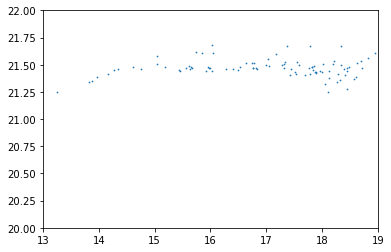

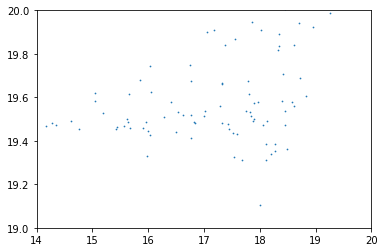

In [225]:
#Beginning of zeropoint calculations
#ic3687
zp_helper(ic3687_ps_rmag,ic3687_mag_r,13,19,20,22)
zp_ic3687_r=zp_calc(ic3687_ps_rmag,ic3687_mag_r,15,18.5,21.25,21.6)
zp_helper(ic3687_ps_hmag, ic3687_mag_h,14,20,19,20)
zp_ic3687_h=zp_calc(ic3687_ps_hmag, ic3687_mag_h,14,18,19.3,19.6)

#,13,19,19,21

In [152]:
#zp_helper_nice(ps_rmag_m51, rmag_m51, 'M51 Panstaars R-band Correlation','R')

/home/daniel/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in greater
  This is separate from the ipykernel package so we can avoid doing imports until
/home/daniel/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in less
  
/home/daniel/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in greater
  


zp: 21.542745829290467
zp: 19.522300888171596


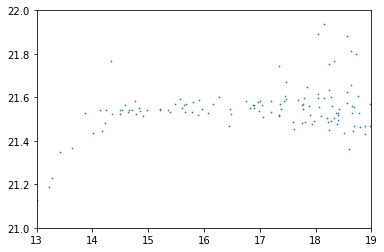

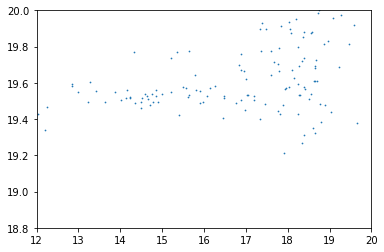

In [227]:
#ugc7559 zeropoint calculation
zp_helper(ugc7559_ps_rmag,ugc7559_mag_r,13,19,21,22)
zp_ugc7559_r=zp_calc(ugc7559_ps_rmag,ugc7559_mag_r,14,18,21.4,21.6)
zp_helper(ugc7559_ps_hmag, ugc7559_mag_h,12,20,18.8,20)
zp_ugc7559_h=zp_calc(ugc7559_ps_hmag, ugc7559_mag_h,13,19,19.4,19.6)

/home/daniel/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in greater
  This is separate from the ipykernel package so we can avoid doing imports until
/home/daniel/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in less
  
/home/daniel/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in greater
  


zp: 21.525753147789217
zp: 19.502082558520357


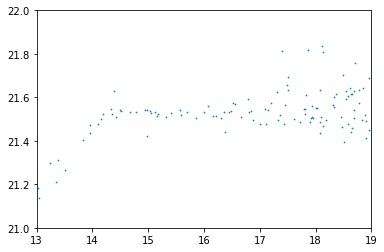

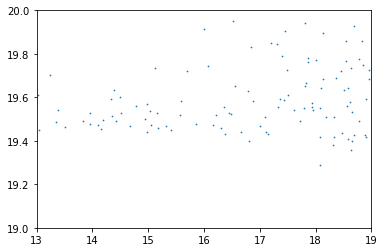

In [229]:
#ugc7605 zeropoint calculation
zp_helper(ugc7605_ps_rmag,ugc7605_mag_r,13,19,21,22)
zp_ugc7605_r=zp_calc(ugc7605_ps_rmag,ugc7605_mag_r,14,18,21.4,21.6)
zp_helper(ugc7605_ps_hmag, ugc7605_mag_h,13,19,19,20)
zp_ugc7605_h=zp_calc(ugc7605_ps_hmag, ugc7605_mag_h,13,19,19.4,19.6)

/home/daniel/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in greater
  This is separate from the ipykernel package so we can avoid doing imports until
/home/daniel/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in less
  
/home/daniel/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in greater
  


zp: 21.30726580203436
zp: 19.28720833932823


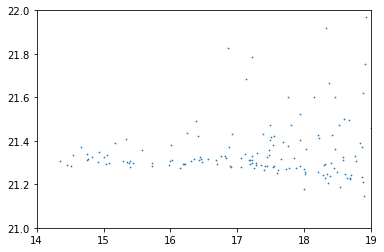

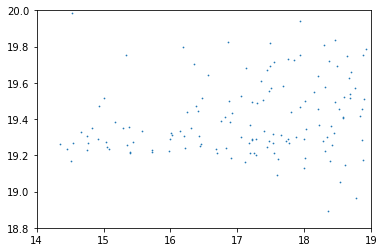

In [230]:
#ugc8651 zeropoint calculation
zp_helper(ugc8651_ps_rmag,ugc8651_mag_r,14,19,21,22)
zp_ugc8651_r=zp_calc(ugc8651_ps_rmag,ugc8651_mag_r,14,18,21.2,21.4)
zp_helper(ugc8651_ps_hmag, ugc8651_mag_h,14,19,18.8,20)
zp_ugc8651_h=zp_calc(ugc8651_ps_hmag, ugc8651_mag_h,14,18,19,19.5)

zp: 21.49008803017281
zp: 19.480140403495426


/home/daniel/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in greater
  This is separate from the ipykernel package so we can avoid doing imports until
/home/daniel/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in less
  
/home/daniel/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in greater
  


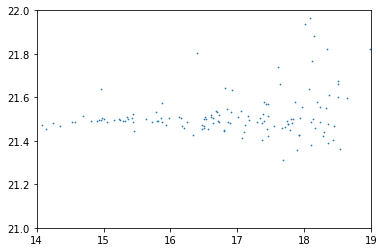

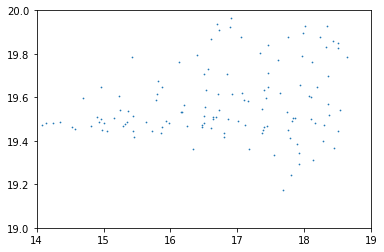

In [233]:
#ugc8760 zeropoint calculation
zp_helper(ugc8760_ps_rmag,ugc8760_mag_r,14,19,21,22)
zp_ugc8760_r=zp_calc(ugc8760_ps_rmag,ugc8760_mag_r,14,18.5,21.4,21.6)
zp_helper(ugc8760_ps_hmag, ugc8760_mag_h,14,19,19,20)
zp_ugc8760_h=zp_calc(ugc8760_ps_hmag, ugc8760_mag_h,14,19,19.3,19.6)

zp: 21.48961856160907
zp: 19.441645098061045


/home/daniel/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in greater
  This is separate from the ipykernel package so we can avoid doing imports until
/home/daniel/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in less
  
/home/daniel/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in greater
  


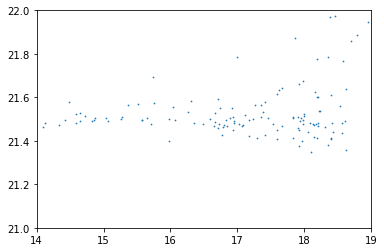

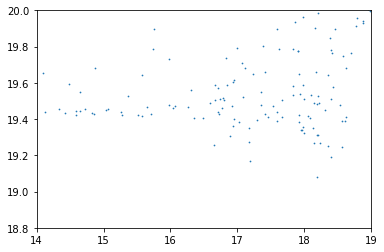

In [234]:
#ugc9128 zeropoint calculation
zp_helper(ugc9128_ps_rmag,ugc9128_mag_r,14,19,21,22)
zp_ugc9128_r=zp_calc(ugc9128_ps_rmag,ugc9128_mag_r,14,18.5,21.38,21.6)
zp_helper(ugc9128_ps_hmag, ugc9128_mag_h,14,19,18.8,20)#
zp_ugc9128_h=zp_calc(ugc9128_ps_hmag, ugc9128_mag_h,14,18.5,19.3,19.55)

/home/daniel/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in greater
  This is separate from the ipykernel package so we can avoid doing imports until
/home/daniel/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in less
  
/home/daniel/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in greater
  


zp: 21.56189006271112
zp: 19.52383758600709


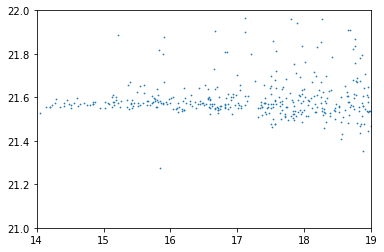

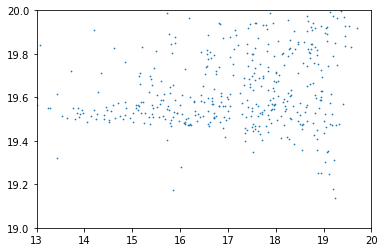

In [237]:
#ngc4163 zeropoint calculation
zp_helper(ngc4163_ps_rmag,ngc4163_mag_r,14,19,21,22)
zp_ngc4163_r=zp_calc(ngc4163_ps_rmag,ngc4163_mag_r,14,19,21.5,21.6)
zp_helper(ngc4163_ps_hmag, ngc4163_mag_h,13,20,19,20)
zp_ngc4163_h=zp_calc(ngc4163_ps_hmag, ngc4163_mag_h,13,19,19.4,19.6)

zp: 21.399740993470715
zp: 19.03280132718279


/home/daniel/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in greater
  This is separate from the ipykernel package so we can avoid doing imports until
/home/daniel/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in less
  
/home/daniel/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in greater
  


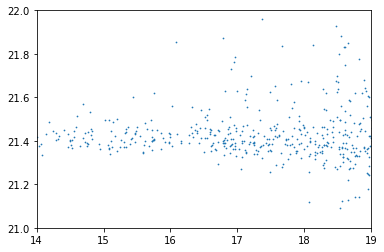

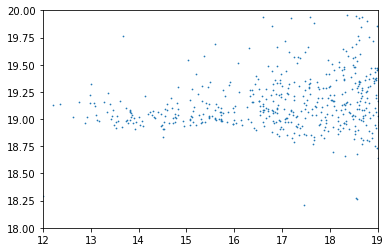

In [239]:
#ugc7577 zeropoint calculation
zp_helper(ugc7577_ps_rmag,ugc7577_mag_r,14,19,21,22)
zp_ugc7577_r=zp_calc(ugc7577_ps_rmag,ugc7577_mag_r,14,19,21.3,21.5)
zp_helper(ugc7577_ps_hmag, ugc7577_mag_h,12,19,18,20)
zp_ugc7577_h=zp_calc(ugc7577_ps_hmag, ugc7577_mag_h,13,18,18.75,19.25)

/home/daniel/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in greater
  This is separate from the ipykernel package so we can avoid doing imports until
/home/daniel/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in less
  
/home/daniel/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in greater
  


zp: 21.562421514508344
zp: 19.53121196926285


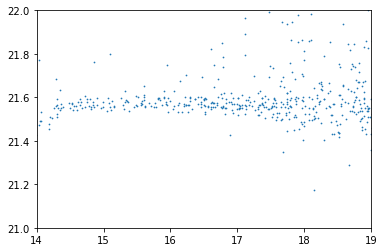

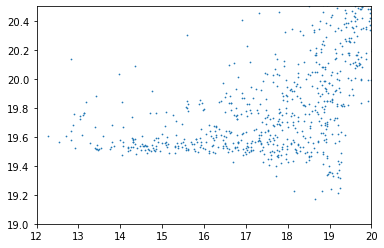

In [242]:
#ugc8320 zeropoint calculation
zp_helper(ugc8320_ps_rmag,ugc8320_mag_r,14,19,21,22)
zp_ugc8320_r=zp_calc(ugc8320_ps_rmag,ugc8320_mag_r,14,19,21.4,21.65)
zp_helper(ugc8320_ps_hmag, ugc8320_mag_h,12,20,19,20.5)
zp_ugc8320_h=zp_calc(ugc8320_ps_hmag, ugc8320_mag_h,13,18,19.4,19.6)

In [244]:
#loading in master images for zeropoint correction. g,ha,r
ic3687_master_r=fits.getdata('/media/daniel/disk/observ_final_data/dwarf/master/ic3687_master_r.fits')
ugc7559_master_r=fits.getdata('/media/daniel/disk/observ_final_data/dwarf/master/ugc7559_master_r.fits')
ugc7605_master_r=fits.getdata('/media/daniel/disk/observ_final_data/dwarf/master/ugc7605_master_r.fits')
ugc8651_master_r=fits.getdata('/media/daniel/disk/observ_final_data/dwarf/master/ugc8651_master_r.fits')
ugc8760_master_r=fits.getdata('/media/daniel/disk/observ_final_data/dwarf/master/ugc8760_master_r.fits')
ugc9128_master_r=fits.getdata('/media/daniel/disk/observ_final_data/dwarf/master/ugc9128_master_r.fits')
ngc4163_master_r=fits.getdata('/media/daniel/disk/observ_final_data/dwarf/master/ngc4163_master_r.fits')
ugc7577_master_r=fits.getdata('/media/daniel/disk/observ_final_data/dwarf/master/ugc7577_master_r.fits')
ugc8320_master_r=fits.getdata('/media/daniel/disk/observ_final_data/dwarf/master/ugc8320_master_r.fits')

ic3687_master_h=fits.getdata('/media/daniel/disk/observ_final_data/dwarf/master/ic3687_master_h.fits')
ugc7559_master_h=fits.getdata('/media/daniel/disk/observ_final_data/dwarf/master/ugc7559_master_h.fits')
ugc7605_master_h=fits.getdata('/media/daniel/disk/observ_final_data/dwarf/master/ugc7605_master_h.fits')
ugc8651_master_h=fits.getdata('/media/daniel/disk/observ_final_data/dwarf/master/ugc8651_master_h.fits')
ugc8760_master_h=fits.getdata('/media/daniel/disk/observ_final_data/dwarf/master/ugc8760_master_h.fits')
ugc9128_master_h=fits.getdata('/media/daniel/disk/observ_final_data/dwarf/master/ugc9128_master_h.fits')
ngc4163_master_h=fits.getdata('/media/daniel/disk/observ_final_data/dwarf/master/ngc4163_master_h.fits')
ugc7577_master_h=fits.getdata('/media/daniel/disk/observ_final_data/dwarf/master/ugc7577_master_h.fits')
ugc8320_master_h=fits.getdata('/media/daniel/disk/observ_final_data/dwarf/master/ugc8320_master_h.fits')

#applying zeropoint to images

ic3687_calib_r=ic3687_master_r*10.**(-0.4*48.6-0.4*zp_ic3687_r)*1.0e29
ugc7559_calib_r=ugc7559_master_r*10.**(-0.4*48.6-0.4*zp_ugc7559_r)*1.0e29
ugc7605_calib_r=ugc7605_master_r*10.**(-0.4*48.6-0.4*zp_ugc7605_r)*1.0e29
ugc8651_calib_r=ugc8651_master_r*10.**(-0.4*48.6-0.4*zp_ugc8651_r)*1.0e29
ugc8760_calib_r=ugc8760_master_r*10.**(-0.4*48.6-0.4*zp_ugc8760_r)*1.0e29
ugc9128_calib_r=ugc9128_master_r*10.**(-0.4*48.6-0.4*zp_ugc9128_r)*1.0e29
ngc4163_calib_r=ngc4163_master_r*10.**(-0.4*48.6-0.4*zp_ngc4163_r)*1.0e29
ugc7577_calib_r=ugc7577_master_r*10.**(-0.4*48.6-0.4*zp_ugc7577_r)*1.0e29
ugc8320_calib_r=ugc8320_master_r*10.**(-0.4*48.6-0.4*zp_ugc8320_r)*1.0e29

ic3687_calib_h=ic3687_master_h*10.**(-0.4*48.6-0.4*zp_ic3687_h)*1.0e29
ugc7559_calib_h=ugc7559_master_h*10.**(-0.4*48.6-0.4*zp_ugc7559_h)*1.0e29
ugc7605_calib_h=ugc7605_master_h*10.**(-0.4*48.6-0.4*zp_ugc7605_h)*1.0e29
ugc8651_calib_h=ugc8651_master_h*10.**(-0.4*48.6-0.4*zp_ugc8651_h)*1.0e29
ugc8760_calib_h=ugc8760_master_h*10.**(-0.4*48.6-0.4*zp_ugc8760_h)*1.0e29
ugc9128_calib_h=ugc9128_master_h*10.**(-0.4*48.6-0.4*zp_ugc9128_h)*1.0e29
ngc4163_calib_h=ngc4163_master_h*10.**(-0.4*48.6-0.4*zp_ngc4163_h)*1.0e29
ugc7577_calib_h=ugc7577_master_h*10.**(-0.4*48.6-0.4*zp_ugc7577_h)*1.0e29
ugc8320_calib_h=ugc8320_master_h*10.**(-0.4*48.6-0.4*zp_ugc8320_h)*1.0e29



In [245]:
#writes given array to give filepath
def writer(arry, filepath):
    shot=fits.PrimaryHDU(arry)
    shot.writeto(filepath,overwrite=True)

In [267]:
#creating subimages to isolate galaxy
ic3687_sub_r,ic3687_sub_h=np.zeros((75,75)),np.zeros((75,75))
ugc7559_sub_r,ugc7559_sub_h=np.zeros((70,80)),np.zeros((70,80))
ugc7605_sub_r,ugc7605_sub_h=np.zeros((65,45)),np.zeros((65,45))
ugc8651_sub_r,ugc8651_sub_h=np.zeros((50,70)),np.zeros((50,70))
ugc8760_sub_r,ugc8760_sub_h=np.zeros((70,55)),np.zeros((70,55))
ugc9128_sub_r,ugc9128_sub_h=np.zeros((55,60)),np.zeros((55,60))
ngc4163_sub_r,ngc4163_sub_h=np.zeros((90,70)),np.zeros((90,70))
ugc7577_sub_r,ugc7577_sub_h=np.zeros((110,105)),np.zeros((110,105))
ugc8320_sub_r,ugc8320_sub_h=np.zeros((130,85)),np.zeros((130,85))

for x in range(440,515):
    for y in range(75,150):
        ic3687_sub_r[y-75][x-440]=ic3687_calib_r[y][x]
        ic3687_sub_h[y-75][x-440]=ic3687_calib_h[y][x]

for x in range(450,530):
    for y in range(85,155):
        ugc7559_sub_r[y-85][x-450]=ugc7559_calib_r[y][x]
        ugc7559_sub_h[y-85][x-450]=ugc7559_calib_h[y][x]
        
for x in range(460,505):
    for y in range(95,160):
        ugc7605_sub_r[y-95][x-460]=ugc7605_calib_r[y][x]
        ugc7605_sub_h[y-95][x-460]=ugc7605_calib_h[y][x]
        
for x in range(460,530):
    for y in range(80,130):
        ugc8651_sub_r[y-80][x-460]=ugc8651_calib_r[y][x]
        ugc8651_sub_h[y-80][x-460]=ugc8651_calib_h[y][x]
        
for x in range(455,510):
    for y in range(85,155):
        ugc8760_sub_r[y-85][x-455]=ugc8760_calib_r[y][x]
        ugc8760_sub_h[y-85][x-455]=ugc8760_calib_h[y][x]
        
for x in range(445,505):
    for y in range(120,175):
        ugc9128_sub_r[y-120][x-445]=ugc9128_calib_r[y][x]
        ugc9128_sub_h[y-120][x-445]=ugc9128_calib_h[y][x]
        
for x in range(80,150):
    for y in range(595,685):
        ngc4163_sub_r[y-595][x-80]=ngc4163_calib_r[y][x]
        ngc4163_sub_h[y-595][x-80]=ngc4163_calib_h[y][x]
        
for x in range(435,540):
    for y in range(830,940):
        ugc7577_sub_r[y-830][x-435]=ugc7577_calib_r[y][x]
        ugc7577_sub_h[y-830][x-435]=ugc7577_calib_h[y][x]
        
for x in range(770,855):
    for y in range(780,910):
        ugc8320_sub_r[y-780][x-770]=ugc8320_calib_r[y][x]
        ugc8320_sub_h[y-780][x-770]=ugc8320_calib_h[y][x]

# #writing to file
writer(ic3687_sub_r,'/media/daniel/disk/observ_final_data/dwarf/subimages/ic3687_sub_r.fits')
writer(ugc7559_sub_r,'/media/daniel/disk/observ_final_data/dwarf/subimages/ugc7559_sub_r.fits')
writer(ugc7605_sub_r,'/media/daniel/disk/observ_final_data/dwarf/subimages/ugc7605_sub_r.fits')
writer(ugc8651_sub_r,'/media/daniel/disk/observ_final_data/dwarf/subimages/ugc8651_sub_r.fits')
writer(ugc8760_sub_r,'/media/daniel/disk/observ_final_data/dwarf/subimages/ugc8760_sub_r.fits')
writer(ugc9128_sub_r,'/media/daniel/disk/observ_final_data/dwarf/subimages/ugc9128_sub_r.fits')
writer(ngc4163_sub_r,'/media/daniel/disk/observ_final_data/dwarf/subimages/ngc4163_sub_r.fits')
writer(ugc7577_sub_r,'/media/daniel/disk/observ_final_data/dwarf/subimages/ugc7577_sub_r.fits')
writer(ugc8320_sub_r,'/media/daniel/disk/observ_final_data/dwarf/subimages/ugc8320_sub_r.fits')

writer(ic3687_sub_h,'/media/daniel/disk/observ_final_data/dwarf/subimages/ic3687_sub_h.fits')
writer(ugc7559_sub_h,'/media/daniel/disk/observ_final_data/dwarf/subimages/ugc7559_sub_h.fits')
writer(ugc7605_sub_h,'/media/daniel/disk/observ_final_data/dwarf/subimages/ugc7605_sub_h.fits')
writer(ugc8651_sub_h,'/media/daniel/disk/observ_final_data/dwarf/subimages/ugc8651_sub_h.fits')
writer(ugc8760_sub_h,'/media/daniel/disk/observ_final_data/dwarf/subimages/ugc8760_sub_h.fits')
writer(ugc9128_sub_h,'/media/daniel/disk/observ_final_data/dwarf/subimages/ugc9128_sub_h.fits')
writer(ngc4163_sub_h,'/media/daniel/disk/observ_final_data/dwarf/subimages/ngc4163_sub_h.fits')
writer(ugc7577_sub_h,'/media/daniel/disk/observ_final_data/dwarf/subimages/ugc7577_sub_h.fits')
writer(ugc8320_sub_h,'/media/daniel/disk/observ_final_data/dwarf/subimages/ugc8320_sub_h.fits')


In [269]:
#making some differences, might avoid convolving because of how small the targets are
writer(ic3687_sub_h-ic3687_sub_r,'/media/daniel/disk/observ_final_data/dwarf/differences/ic3687.fits')
writer(ugc7559_sub_h-ugc7559_sub_r,'/media/daniel/disk/observ_final_data/dwarf/differences/ugc7559.fits')
writer(ugc7605_sub_h-ugc7605_sub_r,'/media/daniel/disk/observ_final_data/dwarf/differences/ugc7605.fits')
writer(ugc8651_sub_h-ugc8651_sub_r,'/media/daniel/disk/observ_final_data/dwarf/differences/ugc8651.fits')
writer(ugc8760_sub_h-ugc8760_sub_r,'/media/daniel/disk/observ_final_data/dwarf/differences/ugc8760.fits')
writer(ugc9128_sub_h-ugc9128_sub_r,'/media/daniel/disk/observ_final_data/dwarf/differences/ugc9128.fits')
writer(ngc4163_sub_h-ngc4163_sub_r,'/media/daniel/disk/observ_final_data/dwarf/differences/ngc4163.fits')
writer(ugc7577_sub_h-ugc7577_sub_r,'/media/daniel/disk/observ_final_data/dwarf/differences/ugc7577.fits')
writer(ugc8320_sub_h-ugc8320_sub_r,'/media/daniel/disk/observ_final_data/dwarf/differences/ugc8320.fits')


In [277]:
#now difference images with convolving 
from astropy.convolution import convolve
from astropy.convolution import Gaussian2DKernel

g = Gaussian2DKernel(2)
writer(convolve(ic3687_sub_h,g)-convolve(ic3687_sub_r,g),'/media/daniel/disk/observ_final_data/dwarf/convolv_differences/ic3687.fits')
writer(convolve(ugc7559_sub_h,g)-convolve(ugc7559_sub_r,g),'/media/daniel/disk/observ_final_data/dwarf/convolv_differences/ugc7559.fits')
writer(convolve(ugc7605_sub_h,g)-convolve(ugc7605_sub_r,g),'/media/daniel/disk/observ_final_data/dwarf/convolv_differences/ugc7605.fits')
writer(convolve(ugc8651_sub_h,g)-convolve(ugc8651_sub_r,g),'/media/daniel/disk/observ_final_data/dwarf/convolv_differences/ugc8651.fits')
writer(convolve(ugc8760_sub_h,g)-convolve(ugc8760_sub_r,g),'/media/daniel/disk/observ_final_data/dwarf/convolv_differences/ugc8760.fits')
writer(convolve(ugc9128_sub_h,g)-convolve(ugc9128_sub_r,g),'/media/daniel/disk/observ_final_data/dwarf/convolv_differences/ugc9128.fits')
writer(convolve(ngc4163_sub_h,g)-convolve(ngc4163_sub_r,g),'/media/daniel/disk/observ_final_data/dwarf/convolv_differences/ngc4163.fits')
writer(convolve(ugc7577_sub_h,g)-convolve(ugc7577_sub_r,g),'/media/daniel/disk/observ_final_data/dwarf/convolv_differences/ugc7577.fits')
writer(convolve(ugc8320_sub_h,g)-convolve(ugc8320_sub_r,g),'/media/daniel/disk/observ_final_data/dwarf/convolv_differences/ugc8320.fits')





In [289]:
def fluxarry(cat, wavelength):#reads out flux and flux err, converts from uJy to ergs and flux in wavelength
    arry=[]
    for row in cat:
        arry.append(row['FLUX_AUTO']*1e-29*3*1e18/(wavelength**2))
    return arry

In [290]:
#reading in fluxes
#using uncertainties package to track changes in error (.nominal_values,.std_devs)
from astropy.io import ascii

ic3687_cat_r=ascii.read('/media/daniel/disk/observ_final_data/dwarf/flux/ic3687r.cat')
ugc7559_cat_r=ascii.read('/media/daniel/disk/observ_final_data/dwarf/flux/ugc7559r.cat')
ugc7605_cat_r=ascii.read('/media/daniel/disk/observ_final_data/dwarf/flux/ugc7605r.cat')
ugc8651_cat_r=ascii.read('/media/daniel/disk/observ_final_data/dwarf/flux/ugc8651r.cat')
ugc8760_cat_r=ascii.read('/media/daniel/disk/observ_final_data/dwarf/flux/ugc8760r.cat')
ugc9128_cat_r=ascii.read('/media/daniel/disk/observ_final_data/dwarf/flux/ugc9128r.cat')
ngc4163_cat_r=ascii.read('/media/daniel/disk/observ_final_data/dwarf/flux/ngc4163r.cat')
ugc7577_cat_r=ascii.read('/media/daniel/disk/observ_final_data/dwarf/flux/ugc7577r.cat')
ugc8320_cat_r=ascii.read('/media/daniel/disk/observ_final_data/dwarf/flux/ugc8320r.cat')

ic3687_cat_h=ascii.read('/media/daniel/disk/observ_final_data/dwarf/flux/ic3687h.cat')
ugc7559_cat_h=ascii.read('/media/daniel/disk/observ_final_data/dwarf/flux/ugc7559h.cat')
ugc7605_cat_h=ascii.read('/media/daniel/disk/observ_final_data/dwarf/flux/ugc7605h.cat')
ugc8651_cat_h=ascii.read('/media/daniel/disk/observ_final_data/dwarf/flux/ugc8651h.cat')
ugc8760_cat_h=ascii.read('/media/daniel/disk/observ_final_data/dwarf/flux/ugc8760h.cat')
ugc9128_cat_h=ascii.read('/media/daniel/disk/observ_final_data/dwarf/flux/ugc9128h.cat')
ngc4163_cat_h=ascii.read('/media/daniel/disk/observ_final_data/dwarf/flux/ngc4163h.cat')
ugc7577_cat_h=ascii.read('/media/daniel/disk/observ_final_data/dwarf/flux/ugc7577h.cat')
ugc8320_cat_h=ascii.read('/media/daniel/disk/observ_final_data/dwarf/flux/ugc8320h.cat')

ic3687_flux_r=fluxarry(ic3687_cat_r,6170)
ugc7559_flux_r=fluxarry(ugc7559_cat_r,6170)
ugc7605_flux_r=fluxarry(ugc7605_cat_r,6170)
ugc8651_flux_r=fluxarry(ugc8651_cat_r,6170)
ugc8760_flux_r=fluxarry(ugc8760_cat_r,6170)
ugc9128_flux_r=fluxarry(ugc9128_cat_r,6170)
ngc4163_flux_r=fluxarry(ngc4163_cat_r,6170)
ugc7577_flux_r=fluxarry(ugc7577_cat_r,6170)
ugc8320_flux_r=fluxarry(ugc8320_cat_r,6170)

ic3687_flux_h=fluxarry(ic3687_cat_h,6563)
ugc7559_flux_h=fluxarry(ugc7559_cat_h,6563)
ugc7605_flux_h=fluxarry(ugc7605_cat_h,6563)
ugc8651_flux_h=fluxarry(ugc8651_cat_h,6563)
ugc8760_flux_h=fluxarry(ugc8760_cat_h,6563)
ugc9128_flux_h=fluxarry(ugc9128_cat_h,6563)
ngc4163_flux_h=fluxarry(ngc4163_cat_h,6563)
ugc7577_flux_h=fluxarry(ugc7577_cat_h,6563)
ugc8320_flux_h=fluxarry(ugc8320_cat_h,6563)




In [291]:
#flux Ha calcutions

ic3687_realflux_h=[]
ugc7559_realflux_h=[]
ugc7605_realflux_h=[]
ugc8651_realflux_h=[]
ugc8760_realflux_h=[]
ugc9128_realflux_h=[]
ngc4163_realflux_h=[]
ugc7577_realflux_h=[]
ugc8320_realflux_h=[]

for x in range(0,len(ic3687_flux_h)):
    ic3687_realflux_h.append((ic3687_flux_r[x]-ic3687_flux_h[x])/(1/1125-1/50))

for x in range(0,len(ugc7559_flux_h)):
    ugc7559_realflux_h.append((ugc7559_flux_r[x]-ugc7559_flux_h[x])/(1/1125-1/50))

for x in range(0,len(ugc7605_flux_h)):
    ugc7605_realflux_h.append((ugc7605_flux_r[x]-ugc7605_flux_h[x])/(1/1125-1/50))
    
for x in range(0,len(ugc8651_flux_h)):
    ugc8651_realflux_h.append((ugc8651_flux_r[x]-ugc8651_flux_h[x])/(1/1125-1/50))
    
for x in range(0,len(ugc8760_flux_h)):
    ugc8760_realflux_h.append((ugc8760_flux_r[x]-ugc8760_flux_h[x])/(1/1125-1/50))
    
for x in range(0,len(ugc9128_flux_h)):
    ugc9128_realflux_h.append((ugc9128_flux_r[x]-ugc9128_flux_h[x])/(1/1125-1/50))
    
for x in range(0,len(ngc4163_flux_h)):
    ngc4163_realflux_h.append((ngc4163_flux_r[x]-ngc4163_flux_h[x])/(1/1125-1/50))
    
for x in range(0,len(ugc7577_flux_h)):
    ugc7577_realflux_h.append((ugc7577_flux_r[x]-ugc7577_flux_h[x])/(1/1125-1/50))
    
for x in range(0,len(ugc8320_flux_h)):
    ugc8320_realflux_h.append((ugc8320_flux_r[x]-ugc8320_flux_h[x])/(1/1125-1/50))


In [388]:
#getting rid of negative fluxes, presume those are coming from field stars not being fully subtracted from difference image
ic3687_realflux_h=np.array(ic3687_realflux_h)[np.where(np.array(ic3687_realflux_h)>0)]
ugc7559_realflux_h=np.array(ugc7559_realflux_h)[np.where(np.array(ugc7559_realflux_h)>0)]
ugc7605_realflux_h=np.array(ugc7605_realflux_h)[np.where(np.array(ugc7605_realflux_h)>0)]
ugc8651_realflux_h=np.array(ugc8651_realflux_h)[np.where(np.array(ugc8651_realflux_h)>0)]
ugc8760_realflux_h=np.array(ugc8760_realflux_h)[np.where(np.array(ugc8760_realflux_h)>0)]
ugc9128_realflux_h=np.array(ugc9128_realflux_h)[np.where(np.array(ugc9128_realflux_h)>0)]
ngc4163_realflux_h=np.array(ngc4163_realflux_h)[np.where(np.array(ngc4163_realflux_h)>0)]
ugc7577_realflux_h=np.array(ugc7577_realflux_h)[np.where(np.array(ugc7577_realflux_h)>0)]
ugc8320_realflux_h=np.array(ugc8320_realflux_h)[np.where(np.array(ugc8320_realflux_h)>0)]

In [389]:
def luminosity(flux, distance):
    return (4*np.pi*(distance)**2*flux)

In [390]:
# total integrated H-alpha flux for each dwarf galaxy
ic3687_sumflux=np.sum(ic3687_realflux_h)
ugc7559_sumflux=np.sum(ugc7559_realflux_h)
ugc7605_sumflux=np.sum(ugc7605_realflux_h)
ugc8651_sumflux=np.sum(ugc8651_realflux_h)
ugc8760_sumflux=np.sum(ugc8760_realflux_h)
ugc9128_sumflux=np.sum(ugc9128_realflux_h)
ngc4163_sumflux=np.sum(ngc4163_realflux_h)
ugc7577_sumflux=np.sum(ugc7577_realflux_h)
ugc8320_sumflux=np.sum(ugc8320_realflux_h)


In [391]:
#finding luminosities

# ic3687 4.12 mpc 1.27e25 cm
# ugc7559 4.61 mpc 1.42e25 cm
# ugc7605 4.61 mpc 1.42e25 cm
# ugc8651 3.10 Mpc 9.57e24
# ugc8760 3.28 mpc 1.91e25
# ugc9128 2.28 Mpc 7.04e24
# ngc4163 2.96 Mpc 9.13e24
# ugc7577 2.58 Mpc 7.96e24
# ugc8320 4.20 Mpc 1.29e25

#m94 4.25 Mpc 1.3e25cm

ic3687_lumin=luminosity(ic3687_sumflux,1.27e25)
ugc7559_lumin=luminosity(ugc7559_sumflux,1.42e25)
ugc7605_lumin=luminosity(ugc7605_sumflux, 1.42e25)
ugc8651_lumin=luminosity(ugc8651_sumflux, 9.57e24)
ugc8760_lumin=luminosity(ugc8760_sumflux, 1.91e25)
ugc9128_lumin=luminosity(ugc9128_sumflux, 7.04e24)
ngc4163_lumin=luminosity(ngc4163_sumflux, 9.13e24)
ugc7577_lumin=luminosity(ugc7577_sumflux, 7.96e24)
ugc8320_lumin=luminosity(ugc8320_sumflux, 1.29e25)

In [392]:
#converts from degrees to radians
def deg_to_rad(deg):
    return np.pi*deg/180

In [393]:
#calculates distance between two objects using formula for angle between two 3-vectors and law of cosines
#d1 and d2 are distances to the object from earth
def distance(d1,ra1,dec1,d2,ra2,dec2):
    dx1, dy1, dz1 = d1*np.cos(deg_to_rad(dec1))*np.cos(deg_to_rad(ra1)), d1*np.cos(deg_to_rad(dec1))*np.sin(deg_to_rad(ra1)), d1*np.sin(deg_to_rad(dec1))
    dx2, dy2, dz2 = d2*np.cos(deg_to_rad(dec2))*np.cos(deg_to_rad(ra2)), d2*np.cos(deg_to_rad(dec2))*np.sin(deg_to_rad(ra2)), d2*np.sin(deg_to_rad(dec2))
    dot=dx1*dx2+dy1*dy2+dz1*dz2
    return np.sqrt(d1**2+d2**2-2*d1*d2*dot/(d1*d2))

In [394]:
#calculating distance between each dwarf galaxy and M94
ic3687_dist=distance(4.12, 190.56, 38.3010, 4.25, 192.72, 41.0712)
ugc7559_dist=distance(4.61, 186.77, 37.0836, 4.25, 192.72, 41.071)
ugc7605_dist=distance(4.61, 187.16, 35.4304, 4.25, 192.72, 41.071)
ugc8651_dist=distance(3.1, 204.97, 40.4421, 4.25, 192.72, 41.071)
ugc8760_dist=distance(3.28, 207.71, 38.0116, 4.25, 192.72, 41.071)
ugc9128_dist=distance(2.28, 213.98, 23.0320, 4.25, 192.72, 41.071)
ngc4163_dist=distance(2.96, 183.92, 43.2939, 4.25, 192.72, 41.071)
ugc7577_dist=distance(2.58, 186.92, 43.2939, 4.25, 192.72, 41.071)
ugc8320_dist=distance(4.2, 198.62, 45.5511, 4.25, 192.72, 41.071)

In [435]:
dist_arry=[ic3687_dist, ugc8320_dist, ugc7559_dist, ugc7605_dist, ugc8760_dist, ugc8651_dist, ngc4163_dist, ugc7577_dist, ugc9128_dist]


In [434]:
lumin_arry=[ic3687_lumin, ugc8320_lumin, ugc7559_lumin, ugc7605_lumin, ugc8760_lumin, ugc8651_lumin, ngc4163_lumin, ugc7577_lumin, ugc9128_lumin]


In [576]:
from scipy.optimize import curve_fit#fitting to ax^-b+C
def func(x,a,b,c): 
    return a * x**(-b)+c
popt, pcov = curve_fit(func, np.array(dist_arry), np.array(lumin_arry),[1e38,2,1])
print(popt)

[4.21547277e+37 4.92498439e-01 1.00000000e+00]


In [578]:
def func2(x,a,b,c): #fitting to a*e^-bx+c
    return a * np.exp(-b * x) + c
popt2, pcov2 = curve_fit(func2, np.array(dist_arry), np.array(lumin_arry),[1e38,2,1])
print(popt2)

[8.14234935e+37 5.51561749e-01 1.00000000e+00]


/home/daniel/miniconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


the closer to 1 the better for this type of error estimation

In [580]:
#coming up with error metric for these functions
curve_err=np.array(lumin_arry)/func(np.array(dist_arry),*popt)
print(1-np.mean(curve_err))

0.008968621913221342


In [585]:
curve_err=np.array(lumin_arry)/func2(np.array(dist_arry),*popt2)
print(1-np.mean(curve_err))

0.03496376750983243


In [581]:
slope, intercept, r_value, p_value, std_err=stats.linregress(dist_arry, lumin_arry)

In [582]:
line_err=np.array(lumin_arry)/(intercept+slope*np.array(dist_arry))
print(1-np.mean(line_err))

0.0464912344235624


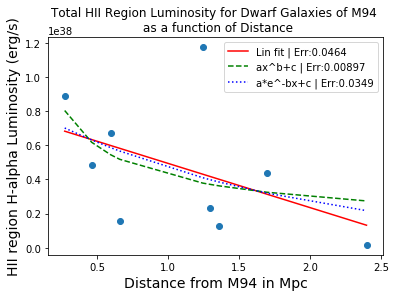

In [586]:
from scipy import stats

plt.figure()
plt.title('Total HII Region Luminosity for Dwarf Galaxies of M94 \n as a function of Distance')
plt.xlabel('Distance from M94 in Mpc',fontsize=14)
plt.ylabel('HII region H-alpha Luminosity (erg/s)',fontsize=14)
plt.scatter(dist_arry, lumin_arry)
plt.plot(dist_arry, intercept+slope*np.array(dist_arry), 'r', label='Lin fit | Err:0.0464')
plt.plot(dist_arry, func(np.array(dist_arry), *popt),'g',linestyle='dashed',label='ax^b+c | Err:0.00897')
plt.plot(dist_arry, func2(np.array(dist_arry), *popt2),'b',linestyle='dotted',label='a*e^-bx+c | Err:0.0349')
plt.legend()


There is definitely an inverse relationship between distance from M94 and the strength of the HII regions in each dwarf galaxy. What is unclear is what law best describes this, but the fact that the force of gravity follows an inverse square would lead one to think that the relation should not be linear in the ideal case.

In [449]:
#err in flux by taking mean of all fluxes that were also incorporated intot the analysis


ic3687_fluxer_r=np.mean(ic3687_cat_r['FLUXERR_AUTO'][np.where(np.array(ic3687_realflux_h)>0)])
ugc7559_fluxer_r=np.mean(ugc7559_cat_r['FLUXERR_AUTO'][np.where(np.array(ugc7559_realflux_h)>0)])
ugc7605_fluxer_r=np.mean(ugc7605_cat_r['FLUXERR_AUTO'][np.where(np.array(ugc7605_realflux_h)>0)])
ugc8651_fluxer_r=np.mean(ugc8651_cat_r['FLUXERR_AUTO'][np.where(np.array(ugc8651_realflux_h)>0)])
ugc8760_fluxer_r=np.mean(ugc8760_cat_r['FLUXERR_AUTO'][np.where(np.array(ugc8760_realflux_h)>0)])
ugc9128_fluxer_r=np.mean(ugc9128_cat_r['FLUXERR_AUTO'][np.where(np.array(ugc9128_realflux_h)>0)])
ngc4163_fluxer_r=np.mean(ngc4163_cat_r['FLUXERR_AUTO'][np.where(np.array(ngc4163_realflux_h)>0)])
ugc7577_fluxer_r=np.mean(ugc7577_cat_r['FLUXERR_AUTO'][np.where(np.array(ugc7577_realflux_h)>0)])
ugc8320_fluxer_r=np.mean(ugc8320_cat_r['FLUXERR_AUTO'][np.where(np.array(ugc8320_realflux_h)>0)])

ic3687_fluxer_h=np.mean(ic3687_cat_h['FLUXERR_AUTO'][np.where(np.array(ic3687_realflux_h)>0)])
ugc7559_fluxer_h=np.mean(ugc7559_cat_h['FLUXERR_AUTO'][np.where(np.array(ugc7559_realflux_h)>0)])
ugc7605_fluxer_h=np.mean(ugc7605_cat_h['FLUXERR_AUTO'][np.where(np.array(ugc7605_realflux_h)>0)])
ugc8651_fluxer_h=np.mean(ugc8651_cat_h['FLUXERR_AUTO'][np.where(np.array(ugc8651_realflux_h)>0)])
ugc8760_fluxer_h=np.mean(ugc8760_cat_h['FLUXERR_AUTO'][np.where(np.array(ugc8760_realflux_h)>0)])
ugc9128_fluxer_h=np.mean(ugc9128_cat_h['FLUXERR_AUTO'][np.where(np.array(ugc9128_realflux_h)>0)])
ngc4163_fluxer_h=np.mean(ngc4163_cat_h['FLUXERR_AUTO'][np.where(np.array(ngc4163_realflux_h)>0)])
ugc7577_fluxer_h=np.mean(ugc7577_cat_h['FLUXERR_AUTO'][np.where(np.array(ugc7577_realflux_h)>0)])
ugc8320_fluxer_h=np.mean(ugc8320_cat_h['FLUXERR_AUTO'][np.where(np.array(ugc8320_realflux_h)>0)])


In [594]:
print('IC 3687 R band Flux Err: '+str(ic3687_fluxer_r)+' uJy')
print('UGC 7559 R band Flux Err: '+str(ugc7559_fluxer_r)+' uJy')
print('UGC 7605 R band Flux Err: '+str(ugc7605_fluxer_r)+' uJy')
print('UGC 8651 R band Flux Err: '+str(ugc8651_fluxer_r)+' uJy')
print('UGC 8760 R band Flux Err: '+str(ugc8760_fluxer_r)+' uJy')
print('UGC 9128 R band Flux Err: '+str(ugc9128_fluxer_r)+' uJy')
print('NGC 4163 R band Flux Err: '+str(ngc4163_fluxer_r)+' uJy')
print('UGC 7577 R band Flux Err: '+str(ugc7577_fluxer_r)+' uJy')
print('UGC 8320 R band Flux Err: '+str(ugc8320_fluxer_r)+' uJy')
print()
print('IC 3687 H band Flux Err: '+str(ic3687_fluxer_h)+' uJy')
print('UGC 7559 H band Flux Err: '+str(ugc7559_fluxer_h)+' uJy')
print('UGC 7605 H band Flux Err: '+str(ugc7605_fluxer_h)+' uJy')
print('UGC 8651 H band Flux Err: '+str(ugc8651_fluxer_h)+' uJy')
print('UGC 8760 H band Flux Err: '+str(ugc8760_fluxer_h)+' uJy')
print('UGC 9128 H band Flux Err: '+str(ugc9128_fluxer_h)+' uJy')
print('NGC 4163 H band Flux Err: '+str(ngc4163_fluxer_h)+' uJy')
print('UGC 7577 H band Flux Err: '+str(ugc7577_fluxer_h)+' uJy')
print('UGC 8320 H band Flux Err: '+str(ugc8320_fluxer_h)+' uJy')

IC 3687 R band Flux Err: 42.50332 uJy
UGC 7559 R band Flux Err: 35.985762 uJy
UGC 7605 R band Flux Err: 21.33902 uJy
UGC 8651 R band Flux Err: 39.26421 uJy
UGC 8760 R band Flux Err: 69.8874 uJy
UGC 9128 R band Flux Err: 20.10466 uJy
NGC 4163 R band Flux Err: 21.090687499999998 uJy
UGC 7577 R band Flux Err: 36.234202 uJy
UGC 8320 R band Flux Err: 17.52804433333333 uJy

IC 3687 H band Flux Err: 47.5374 uJy
UGC 7559 H band Flux Err: 37.999716 uJy
UGC 7605 H band Flux Err: 22.123745 uJy
UGC 8651 H band Flux Err: 37.89296 uJy
UGC 8760 H band Flux Err: 72.663855 uJy
UGC 9128 H band Flux Err: 20.76617 uJy
NGC 4163 H band Flux Err: 35.5879775 uJy
UGC 7577 H band Flux Err: 52.691877999999996 uJy
UGC 8320 H band Flux Err: 21.87308133333333 uJy
